In [9]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from tqdm import tqdm

In [10]:
"Hyper parameters"
batch_size_train = 64
batch_size_val = 1000
n_epochs = 80
learning_rate = 0.0013
momentum = 0.5

In [11]:
"load the data from the folders"
def get_data():
    data_dir = '/Users/xiaodanwu/Desktop/8th/AI/final.project/data' #change here the path 

    transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),transforms.Resize((40,114)),transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

    # ImageFolder automatically assign labels to imgs using the name of their folder
    train_set = datasets.ImageFolder(data_dir + '/train',transform=transform)
    val_set = datasets.ImageFolder(data_dir + '/val',transform=transform)
    
    img, label = train_set[0]
    print("my input data size: ", img.shape)

    train_loader = DataLoader(train_set, batch_size=batch_size_train, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size_val, shuffle=True)

    return train_loader, val_loader
train_loader, val_loader = get_data()


my input data size:  torch.Size([1, 40, 114])


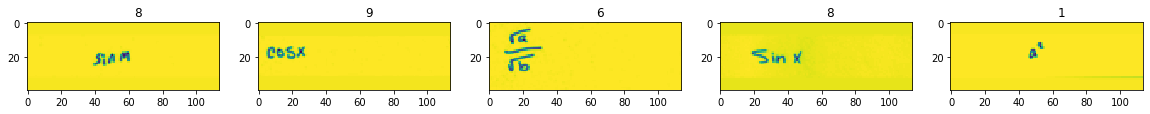

torch.Size([64, 1, 40, 114])


In [12]:
"visualize first 5 images"
def train_imshow(train_loader):
    classes = ('1', '10', '2', '3', '4', '5', '6', '7', '8', '9') # Defining the classes we have
    dataiter = iter(train_loader)
    images, labels = dataiter.next()
    fig, axes = plt.subplots(figsize=(20, 8), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].permute(1,2,0).squeeze()) 
        ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
    plt.show()
train_imshow(train_loader)
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    break

In [17]:
"define the cnn model"
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d(0.2)
        self.fc1 = nn.Linear(3500, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 20*7*25)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, -1)


In [18]:
def test(model, test_loader, device):
    # evaluation, freeze 
    model.eval()
    total_num = 0
    total_correct = 0
    with torch.no_grad():
        for _, (data, target) in enumerate(test_loader):
            
            data = data.to(device)
            target = target.to(device)
            
            predict_one_hot = model(data)
            
            _, predict_label = torch.max(predict_one_hot, 1)
            print("llllll",predict_label)
            total_correct += (predict_label == target).sum().item()
            total_num += target.size(0)
        
    return (total_correct / total_num)

In [19]:
"define the training procedure"
def train(model, train_loader, test_loader, num_epoch, learning_rate, momentum, device):
    train_losses = []
    # 1, define optimizer
    "TODO: try different optimizer"
    optimizer = optim.Adam(network.parameters(), lr=learning_rate)

    for epoch in tqdm(range(num_epoch)):
        # train the model
        model.train()
        for i, (data, target) in enumerate(train_loader):
            
            data = data.to(device)
            target = target.to(device)
            optimizer.zero_grad()
            
            # 2, forward
            output = network(data)
            
            # 3, calculate the loss
            "TODO: try use cross entropy loss instead "
            loss = F.nll_loss(output, target)
            
            # 4, backward
            loss.backward()
            optimizer.step()
        # evaluate the accuracy on test data for each epoch
        accuracy = test(model, test_loader, device)
        print('accuracy', accuracy)
        print("loss: ",loss)
        
    # 5, save model
    "TODO: change the number of epochs save the model with the best prediction accuracy"

In [20]:
device0 = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
network = Net().to(device0)
train(model=network, train_loader=train_loader, test_loader=val_loader, num_epoch=n_epochs, learning_rate=learning_rate, momentum=momentum, device=device0)

  1%|▏         | 1/80 [00:01<02:31,  1.92s/it]

llllll tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
accuracy 0.1
loss:  tensor(2.2905, grad_fn=<NllLossBackward0>)


  2%|▎         | 2/80 [00:03<02:27,  1.89s/it]

llllll tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
accuracy 0.1
loss:  tensor(2.3023, grad_fn=<NllLossBackward0>)


  4%|▍         | 3/80 [00:05<02:23,  1.87s/it]

llllll tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
        1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
        3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3])
accuracy 0.12777777777777777
loss:  tensor(2.2994, grad_fn=<NllLossBackward0>)


  5%|▌         | 4/80 [00:07<02:20,  1.85s/it]

llllll tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
accuracy 0.10555555555555556
loss:  tensor(2.2329, grad_fn=<NllLossBackward0>)


  6%|▋         | 5/80 [00:09<02:17,  1.84s/it]

llllll tensor([1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1,
        1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 6, 6, 1, 5,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
        3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 6, 6, 3, 5, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1,
        1, 1, 3, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6,
        1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
        1, 6, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3])
accuracy 0.13333333333333333
loss:  tensor(2.2474, grad_fn=<NllLossBackward0>)


  8%|▊         | 6/80 [00:10<02:15,  1.83s/it]

llllll tensor([1, 1, 1, 3, 6, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1,
        1, 1, 6, 1, 6, 3, 3, 1, 3, 1, 6, 3, 1, 3, 9, 1, 5, 6, 6, 1, 3, 1, 1, 1,
        3, 3, 1, 1, 3, 1, 1, 1, 3, 6, 1, 1, 6, 1, 1, 3, 6, 1, 3, 1, 9, 1, 1, 3,
        1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 8, 3, 8, 1, 3, 1, 6, 1, 6, 1, 1, 1, 6, 1,
        3, 1, 3, 3, 3, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 6, 1, 5, 3, 1, 1, 1,
        1, 1, 1, 3, 1, 9, 1, 3, 1, 3, 1, 1, 5, 1, 3, 1, 1, 1, 6, 1, 1, 1, 3, 3,
        1, 6, 3, 3, 1, 1, 9, 1, 3, 1, 1, 3, 1, 3, 6, 1, 1, 3, 8, 1, 1, 1, 1, 9,
        3, 9, 1, 1, 1, 3, 1, 6, 1, 9, 9, 8])
accuracy 0.18333333333333332
loss:  tensor(2.2106, grad_fn=<NllLossBackward0>)


  9%|▉         | 7/80 [00:12<02:12,  1.82s/it]

llllll tensor([6, 7, 1, 1, 5, 1, 6, 1, 1, 1, 5, 6, 1, 6, 6, 6, 1, 1, 1, 1, 1, 6, 6, 6,
        6, 6, 6, 1, 6, 6, 6, 9, 1, 1, 6, 1, 9, 9, 6, 1, 6, 6, 1, 1, 1, 1, 6, 1,
        1, 6, 1, 1, 6, 1, 1, 1, 1, 6, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6,
        6, 6, 9, 5, 6, 6, 1, 6, 9, 6, 1, 6, 1, 6, 1, 1, 1, 5, 6, 1, 1, 9, 1, 1,
        1, 1, 1, 9, 1, 1, 6, 9, 1, 6, 1, 6, 6, 1, 6, 6, 1, 6, 7, 1, 1, 6, 1, 1,
        6, 1, 1, 6, 6, 1, 1, 1, 6, 6, 9, 1, 1, 1, 1, 9, 6, 2, 1, 1, 6, 1, 1, 1,
        6, 6, 1, 6, 6, 2, 6, 6, 1, 6, 9, 1, 1, 6, 6, 6, 6, 6, 1, 1, 6, 6, 6, 8,
        1, 1, 6, 1, 1, 1, 1, 1, 6, 6, 1, 5])
accuracy 0.2
loss:  tensor(2.0516, grad_fn=<NllLossBackward0>)


 10%|█         | 8/80 [00:14<02:10,  1.82s/it]

llllll tensor([6, 6, 5, 1, 3, 1, 9, 6, 9, 9, 5, 5, 8, 5, 9, 6, 3, 3, 1, 3, 6, 9, 6, 9,
        6, 3, 1, 9, 9, 1, 6, 6, 6, 1, 9, 1, 1, 9, 6, 9, 3, 6, 1, 8, 5, 6, 5, 1,
        9, 6, 5, 6, 6, 1, 1, 1, 3, 5, 1, 1, 8, 3, 1, 8, 1, 6, 5, 3, 6, 1, 6, 3,
        9, 6, 3, 3, 6, 5, 9, 6, 1, 6, 9, 1, 7, 6, 0, 1, 6, 1, 8, 1, 1, 3, 1, 9,
        9, 6, 1, 8, 9, 5, 8, 1, 6, 1, 8, 6, 1, 7, 7, 6, 5, 1, 1, 1, 1, 6, 6, 5,
        5, 9, 1, 3, 6, 1, 3, 1, 3, 1, 1, 6, 9, 1, 5, 6, 6, 1, 6, 6, 3, 1, 6, 6,
        1, 6, 5, 6, 1, 3, 3, 6, 9, 9, 6, 6, 3, 3, 9, 9, 7, 5, 8, 7, 6, 1, 3, 9,
        7, 1, 3, 3, 6, 9, 6, 7, 9, 1, 9, 1])
accuracy 0.2833333333333333
loss:  tensor(1.9072, grad_fn=<NllLossBackward0>)


 11%|█▏        | 9/80 [00:16<02:08,  1.81s/it]

llllll tensor([8, 1, 6, 6, 9, 8, 7, 6, 6, 6, 6, 3, 8, 7, 9, 8, 7, 3, 2, 8, 7, 5, 6, 1,
        7, 6, 6, 7, 8, 6, 6, 8, 3, 6, 8, 6, 5, 6, 1, 2, 2, 2, 1, 5, 8, 9, 6, 6,
        6, 8, 6, 1, 1, 8, 9, 2, 5, 3, 6, 3, 2, 1, 8, 1, 6, 7, 8, 9, 5, 6, 7, 9,
        8, 8, 1, 6, 8, 8, 8, 6, 6, 7, 7, 3, 8, 6, 1, 1, 8, 5, 8, 2, 1, 6, 1, 7,
        6, 2, 6, 2, 9, 2, 1, 9, 2, 8, 2, 6, 6, 1, 6, 6, 1, 8, 8, 1, 6, 1, 6, 5,
        6, 7, 7, 3, 6, 1, 8, 6, 8, 8, 1, 8, 8, 1, 1, 8, 6, 5, 8, 7, 8, 9, 7, 7,
        8, 1, 2, 6, 6, 6, 8, 6, 6, 1, 8, 6, 6, 6, 1, 3, 1, 8, 6, 6, 8, 6, 1, 1,
        3, 3, 8, 1, 8, 2, 8, 6, 8, 9, 6, 3])
accuracy 0.3277777777777778
loss:  tensor(1.9755, grad_fn=<NllLossBackward0>)


 12%|█▎        | 10/80 [00:18<02:06,  1.81s/it]

llllll tensor([8, 5, 6, 6, 3, 5, 7, 6, 7, 6, 8, 1, 6, 6, 5, 1, 3, 7, 1, 5, 9, 3, 6, 6,
        7, 6, 1, 0, 3, 1, 6, 6, 6, 6, 8, 5, 5, 6, 7, 9, 1, 7, 5, 6, 8, 7, 5, 1,
        6, 3, 8, 8, 7, 6, 7, 9, 3, 9, 9, 5, 1, 1, 7, 9, 1, 6, 1, 7, 9, 9, 9, 9,
        7, 8, 7, 6, 5, 7, 1, 5, 1, 8, 9, 5, 6, 5, 3, 6, 3, 1, 7, 7, 7, 9, 7, 8,
        1, 1, 1, 9, 5, 8, 1, 1, 8, 7, 1, 5, 5, 1, 6, 6, 5, 6, 3, 1, 1, 3, 1, 7,
        6, 7, 1, 1, 6, 1, 7, 8, 5, 7, 1, 3, 7, 6, 1, 6, 1, 3, 5, 8, 8, 6, 1, 7,
        6, 1, 5, 7, 3, 1, 3, 1, 9, 1, 6, 5, 6, 0, 6, 6, 8, 8, 6, 5, 6, 3, 7, 8,
        7, 3, 7, 8, 5, 1, 6, 5, 1, 7, 8, 1])
accuracy 0.37777777777777777
loss:  tensor(1.8587, grad_fn=<NllLossBackward0>)


 14%|█▍        | 11/80 [00:20<02:04,  1.81s/it]

llllll tensor([7, 7, 5, 7, 5, 8, 8, 7, 9, 7, 6, 5, 1, 7, 1, 6, 1, 7, 1, 6, 9, 7, 3, 8,
        7, 7, 5, 5, 8, 8, 6, 5, 6, 1, 9, 7, 7, 3, 5, 3, 7, 5, 6, 9, 5, 1, 6, 9,
        6, 3, 7, 9, 8, 7, 3, 5, 7, 8, 9, 6, 1, 5, 5, 8, 5, 8, 9, 1, 5, 5, 9, 1,
        9, 7, 5, 8, 5, 9, 9, 0, 5, 8, 1, 8, 8, 7, 9, 7, 6, 3, 7, 7, 3, 5, 1, 5,
        7, 3, 5, 3, 5, 1, 3, 7, 7, 6, 6, 3, 8, 7, 5, 6, 5, 9, 5, 8, 3, 6, 6, 9,
        1, 3, 0, 1, 5, 5, 6, 6, 5, 7, 6, 6, 5, 9, 9, 7, 7, 3, 6, 9, 5, 3, 5, 4,
        8, 9, 1, 8, 5, 5, 8, 1, 8, 8, 1, 5, 6, 9, 1, 5, 8, 9, 1, 9, 3, 7, 9, 6,
        7, 8, 5, 4, 8, 1, 3, 5, 3, 8, 1, 9])
accuracy 0.4388888888888889
loss:  tensor(1.6960, grad_fn=<NllLossBackward0>)


 15%|█▌        | 12/80 [00:21<02:03,  1.81s/it]

llllll tensor([0, 1, 1, 2, 6, 6, 7, 2, 9, 9, 4, 2, 6, 7, 9, 9, 5, 8, 1, 7, 7, 4, 9, 7,
        6, 7, 4, 6, 6, 1, 0, 1, 1, 9, 2, 1, 1, 8, 5, 2, 6, 2, 6, 6, 5, 9, 4, 4,
        0, 5, 1, 3, 9, 8, 6, 7, 7, 6, 9, 4, 3, 7, 8, 6, 6, 6, 6, 8, 7, 9, 0, 2,
        4, 1, 1, 0, 2, 9, 7, 2, 9, 1, 8, 6, 1, 6, 9, 9, 7, 8, 9, 1, 9, 7, 8, 6,
        9, 4, 7, 2, 7, 2, 2, 6, 6, 2, 3, 7, 1, 4, 9, 4, 7, 9, 6, 1, 4, 1, 1, 2,
        9, 6, 2, 5, 7, 1, 6, 6, 2, 8, 7, 4, 6, 2, 4, 6, 7, 9, 9, 5, 1, 1, 2, 7,
        2, 9, 5, 6, 4, 7, 7, 6, 1, 2, 2, 6, 9, 6, 6, 6, 1, 9, 6, 4, 9, 6, 6, 6,
        9, 6, 3, 2, 6, 6, 6, 4, 1, 6, 9, 1])
accuracy 0.4166666666666667
loss:  tensor(1.9266, grad_fn=<NllLossBackward0>)


 16%|█▋        | 13/80 [00:23<02:01,  1.81s/it]

llllll tensor([5, 3, 3, 3, 6, 9, 8, 1, 9, 1, 7, 2, 1, 6, 3, 6, 4, 6, 1, 8, 1, 9, 6, 6,
        9, 8, 1, 6, 6, 3, 9, 4, 3, 1, 8, 8, 6, 5, 7, 8, 9, 2, 3, 7, 6, 1, 8, 4,
        9, 7, 9, 6, 7, 2, 5, 8, 9, 6, 3, 6, 9, 0, 6, 5, 7, 9, 1, 8, 1, 8, 1, 1,
        7, 4, 3, 4, 1, 5, 9, 6, 6, 1, 9, 1, 3, 6, 6, 5, 5, 8, 9, 7, 7, 1, 9, 7,
        4, 7, 6, 6, 3, 1, 7, 5, 1, 3, 2, 7, 1, 0, 5, 7, 8, 9, 2, 7, 6, 9, 6, 7,
        3, 8, 6, 3, 1, 7, 7, 8, 9, 6, 3, 1, 5, 6, 3, 8, 7, 3, 9, 6, 1, 8, 7, 7,
        8, 4, 1, 6, 8, 5, 8, 5, 7, 4, 5, 7, 3, 8, 7, 4, 2, 9, 6, 7, 1, 8, 9, 3,
        3, 0, 3, 7, 6, 9, 9, 8, 8, 3, 9, 6])
accuracy 0.4666666666666667
loss:  tensor(1.9175, grad_fn=<NllLossBackward0>)


 18%|█▊        | 14/80 [00:25<02:00,  1.82s/it]

llllll tensor([8, 2, 5, 8, 6, 1, 2, 6, 4, 1, 7, 3, 1, 0, 1, 6, 8, 9, 9, 6, 1, 0, 7, 5,
        8, 1, 7, 0, 7, 7, 6, 6, 9, 8, 1, 7, 1, 6, 4, 7, 8, 7, 3, 3, 0, 7, 6, 2,
        6, 4, 1, 9, 7, 8, 7, 5, 1, 1, 9, 3, 6, 3, 7, 9, 6, 8, 1, 0, 5, 1, 1, 7,
        6, 2, 5, 7, 0, 5, 7, 9, 7, 7, 6, 0, 8, 9, 1, 6, 0, 7, 6, 6, 7, 4, 4, 5,
        7, 9, 3, 4, 4, 6, 1, 7, 6, 5, 5, 0, 9, 6, 6, 1, 9, 9, 2, 7, 3, 6, 1, 7,
        6, 4, 0, 4, 3, 3, 6, 4, 0, 7, 8, 4, 8, 0, 1, 9, 0, 6, 1, 9, 9, 1, 1, 5,
        7, 6, 7, 6, 7, 7, 6, 2, 6, 9, 2, 6, 5, 8, 6, 5, 8, 6, 7, 7, 1, 4, 5, 7,
        3, 9, 8, 0, 7, 7, 7, 4, 7, 0, 4, 6])
accuracy 0.4166666666666667
loss:  tensor(1.6326, grad_fn=<NllLossBackward0>)


 19%|█▉        | 15/80 [00:27<01:58,  1.82s/it]

llllll tensor([7, 2, 6, 6, 6, 2, 1, 5, 6, 8, 4, 4, 9, 9, 8, 4, 1, 7, 1, 6, 1, 8, 2, 6,
        6, 6, 8, 0, 6, 5, 7, 7, 6, 5, 1, 7, 6, 0, 7, 8, 6, 7, 4, 4, 8, 9, 8, 3,
        4, 0, 6, 5, 1, 2, 4, 7, 7, 8, 9, 2, 7, 6, 8, 8, 9, 7, 1, 8, 7, 6, 2, 5,
        9, 8, 8, 1, 6, 5, 8, 2, 3, 7, 1, 3, 1, 8, 1, 6, 1, 1, 0, 6, 3, 6, 9, 9,
        9, 3, 3, 0, 0, 9, 7, 6, 7, 6, 4, 6, 4, 1, 6, 0, 9, 7, 1, 5, 7, 1, 6, 9,
        4, 2, 1, 7, 0, 4, 4, 1, 6, 6, 8, 6, 2, 8, 8, 5, 6, 6, 7, 2, 5, 3, 3, 7,
        9, 4, 8, 3, 4, 0, 1, 6, 6, 1, 8, 8, 1, 8, 9, 5, 6, 7, 9, 7, 8, 5, 8, 0,
        1, 8, 8, 6, 1, 4, 3, 8, 3, 6, 7, 4])
accuracy 0.45
loss:  tensor(1.6324, grad_fn=<NllLossBackward0>)


 20%|██        | 16/80 [00:29<01:56,  1.82s/it]

llllll tensor([9, 6, 7, 5, 9, 3, 6, 2, 7, 1, 5, 5, 6, 7, 6, 6, 8, 3, 9, 6, 5, 9, 7, 8,
        3, 6, 7, 4, 8, 1, 8, 9, 5, 3, 4, 5, 9, 8, 6, 8, 9, 6, 7, 5, 7, 1, 7, 1,
        7, 1, 7, 2, 8, 5, 8, 8, 8, 8, 5, 7, 5, 3, 7, 3, 8, 3, 7, 5, 7, 7, 1, 8,
        1, 5, 1, 5, 5, 2, 1, 9, 5, 2, 3, 6, 5, 7, 1, 2, 2, 7, 6, 9, 0, 8, 7, 8,
        3, 7, 1, 7, 1, 4, 6, 8, 2, 3, 1, 6, 5, 4, 8, 2, 9, 7, 4, 4, 4, 2, 0, 3,
        8, 7, 6, 6, 1, 7, 1, 1, 5, 6, 1, 1, 3, 7, 3, 0, 7, 5, 5, 8, 1, 8, 7, 3,
        1, 5, 3, 8, 7, 5, 5, 0, 6, 8, 4, 6, 2, 1, 4, 2, 6, 7, 0, 5, 1, 7, 6, 5,
        1, 6, 1, 8, 3, 7, 6, 7, 0, 3, 8, 3])
accuracy 0.45
loss:  tensor(1.4908, grad_fn=<NllLossBackward0>)


 21%|██▏       | 17/80 [00:30<01:54,  1.81s/it]

llllll tensor([5, 7, 1, 1, 9, 9, 8, 4, 9, 9, 7, 6, 1, 1, 4, 9, 6, 1, 8, 1, 9, 1, 5, 6,
        7, 3, 5, 6, 3, 1, 1, 1, 6, 7, 6, 8, 6, 6, 8, 4, 3, 9, 3, 6, 9, 2, 9, 6,
        6, 6, 1, 7, 3, 4, 6, 9, 7, 1, 6, 6, 1, 3, 3, 6, 3, 3, 3, 8, 3, 3, 5, 4,
        7, 6, 7, 7, 9, 9, 1, 3, 6, 6, 3, 5, 6, 9, 5, 3, 1, 9, 5, 5, 6, 5, 6, 8,
        6, 7, 0, 6, 7, 8, 4, 1, 6, 8, 6, 1, 3, 9, 3, 7, 3, 1, 5, 8, 7, 4, 2, 6,
        6, 8, 6, 9, 1, 0, 7, 3, 9, 5, 4, 5, 4, 1, 1, 0, 9, 2, 9, 8, 3, 3, 7, 0,
        7, 1, 9, 6, 8, 6, 5, 7, 3, 9, 2, 9, 6, 4, 1, 9, 9, 4, 3, 0, 1, 9, 5, 3,
        0, 0, 5, 4, 9, 7, 4, 9, 3, 7, 0, 6])
accuracy 0.49444444444444446
loss:  tensor(1.6033, grad_fn=<NllLossBackward0>)


 22%|██▎       | 18/80 [00:32<01:51,  1.80s/it]

llllll tensor([6, 1, 3, 0, 2, 5, 6, 3, 6, 6, 0, 7, 8, 6, 4, 6, 4, 1, 7, 7, 6, 6, 1, 4,
        3, 9, 9, 7, 5, 1, 1, 4, 0, 1, 1, 4, 5, 9, 5, 5, 0, 7, 3, 4, 0, 2, 6, 8,
        6, 6, 5, 2, 4, 2, 8, 3, 7, 5, 0, 3, 8, 5, 1, 4, 8, 1, 4, 8, 3, 0, 1, 3,
        5, 1, 8, 0, 4, 1, 7, 1, 6, 0, 9, 3, 7, 1, 7, 1, 3, 4, 7, 7, 0, 1, 6, 6,
        9, 1, 9, 0, 8, 8, 3, 7, 6, 4, 8, 9, 9, 5, 3, 1, 9, 5, 6, 5, 0, 8, 8, 1,
        3, 8, 0, 9, 8, 8, 7, 1, 6, 1, 5, 4, 0, 0, 8, 0, 6, 0, 1, 3, 6, 3, 1, 9,
        5, 8, 6, 8, 1, 8, 3, 1, 4, 5, 9, 7, 1, 3, 7, 1, 4, 6, 8, 5, 8, 3, 7, 6,
        1, 5, 2, 1, 8, 3, 6, 1, 1, 6, 6, 6])
accuracy 0.5277777777777778
loss:  tensor(1.2027, grad_fn=<NllLossBackward0>)


 24%|██▍       | 19/80 [00:34<01:49,  1.80s/it]

llllll tensor([3, 8, 3, 6, 8, 7, 9, 3, 1, 4, 0, 6, 7, 4, 8, 8, 0, 1, 4, 6, 6, 8, 5, 6,
        1, 9, 1, 9, 5, 0, 5, 5, 9, 9, 9, 9, 7, 5, 5, 8, 6, 9, 9, 6, 2, 6, 6, 1,
        1, 2, 1, 7, 8, 6, 2, 4, 0, 7, 1, 0, 4, 0, 9, 3, 3, 8, 8, 6, 7, 5, 0, 5,
        4, 1, 2, 3, 3, 0, 6, 7, 5, 0, 3, 7, 4, 9, 7, 7, 4, 8, 4, 2, 9, 6, 3, 5,
        6, 9, 9, 1, 1, 2, 4, 1, 6, 6, 8, 8, 6, 2, 1, 4, 0, 1, 9, 5, 9, 7, 8, 2,
        4, 5, 6, 9, 2, 7, 6, 0, 2, 0, 7, 8, 2, 7, 0, 4, 6, 2, 7, 9, 8, 6, 0, 2,
        2, 6, 1, 0, 4, 7, 0, 4, 3, 8, 2, 8, 9, 4, 9, 6, 0, 6, 4, 6, 9, 0, 0, 0,
        6, 2, 6, 4, 3, 3, 1, 8, 3, 9, 1, 8])
accuracy 0.5444444444444444
loss:  tensor(1.4090, grad_fn=<NllLossBackward0>)


 25%|██▌       | 20/80 [00:36<01:47,  1.80s/it]

llllll tensor([5, 7, 0, 2, 7, 6, 1, 3, 7, 1, 9, 6, 9, 0, 9, 6, 5, 6, 7, 1, 6, 3, 6, 9,
        5, 1, 5, 7, 3, 4, 3, 4, 3, 7, 1, 8, 1, 0, 4, 4, 1, 6, 9, 3, 9, 5, 6, 6,
        9, 6, 0, 5, 6, 7, 9, 7, 5, 0, 1, 1, 1, 9, 1, 8, 5, 7, 7, 6, 6, 3, 4, 9,
        1, 9, 7, 9, 1, 1, 5, 3, 6, 1, 5, 9, 1, 6, 2, 5, 9, 5, 0, 1, 6, 0, 8, 7,
        1, 4, 0, 9, 2, 6, 8, 5, 1, 1, 3, 8, 9, 9, 3, 1, 9, 5, 1, 3, 5, 3, 6, 2,
        4, 6, 6, 1, 6, 1, 4, 6, 1, 9, 5, 1, 2, 8, 3, 8, 1, 5, 8, 1, 7, 6, 9, 6,
        7, 0, 4, 7, 4, 1, 1, 7, 0, 4, 8, 7, 3, 1, 3, 3, 7, 6, 5, 7, 6, 8, 6, 6,
        2, 1, 9, 4, 5, 6, 7, 3, 9, 4, 1, 3])
accuracy 0.5333333333333333
loss:  tensor(1.2884, grad_fn=<NllLossBackward0>)


 26%|██▋       | 21/80 [00:38<01:45,  1.79s/it]

llllll tensor([4, 9, 2, 7, 9, 7, 7, 4, 5, 6, 9, 9, 3, 9, 6, 4, 2, 4, 8, 6, 6, 4, 7, 7,
        8, 0, 1, 1, 1, 8, 9, 7, 4, 3, 8, 5, 6, 4, 6, 4, 4, 9, 1, 3, 0, 6, 7, 6,
        8, 3, 3, 9, 7, 9, 3, 8, 6, 8, 1, 6, 1, 1, 5, 3, 3, 4, 0, 1, 8, 7, 0, 6,
        0, 5, 6, 4, 0, 1, 4, 6, 7, 4, 9, 1, 5, 8, 8, 7, 6, 8, 0, 8, 7, 0, 0, 1,
        1, 6, 4, 4, 0, 8, 9, 8, 4, 3, 3, 3, 1, 1, 3, 9, 0, 4, 9, 7, 8, 1, 9, 4,
        6, 4, 0, 3, 1, 1, 1, 4, 5, 5, 4, 6, 9, 7, 9, 1, 7, 0, 4, 3, 2, 0, 7, 5,
        5, 6, 3, 3, 0, 3, 6, 4, 8, 6, 0, 1, 6, 1, 3, 6, 9, 2, 1, 6, 1, 3, 4, 9,
        1, 4, 4, 4, 1, 8, 9, 3, 3, 1, 4, 1])
accuracy 0.5611111111111111
loss:  tensor(1.6693, grad_fn=<NllLossBackward0>)


 28%|██▊       | 22/80 [00:39<01:43,  1.79s/it]

llllll tensor([7, 1, 5, 5, 1, 3, 6, 3, 2, 1, 7, 2, 9, 8, 7, 7, 9, 0, 6, 0, 5, 3, 5, 1,
        5, 2, 1, 3, 6, 0, 7, 1, 3, 7, 3, 4, 9, 1, 6, 3, 3, 9, 7, 6, 5, 5, 4, 1,
        0, 0, 7, 5, 3, 9, 1, 9, 1, 0, 1, 1, 6, 5, 1, 4, 8, 5, 7, 9, 0, 8, 9, 5,
        7, 8, 1, 9, 7, 5, 9, 0, 8, 9, 1, 8, 1, 1, 4, 5, 6, 0, 1, 1, 0, 3, 4, 5,
        2, 6, 9, 3, 1, 7, 5, 9, 0, 9, 0, 6, 0, 1, 1, 7, 6, 1, 9, 4, 1, 1, 4, 8,
        6, 8, 6, 1, 6, 1, 0, 7, 5, 7, 5, 9, 7, 4, 5, 8, 3, 5, 4, 3, 5, 9, 5, 1,
        0, 7, 4, 6, 5, 2, 9, 5, 3, 8, 5, 5, 7, 7, 1, 4, 1, 6, 8, 3, 5, 8, 5, 5,
        1, 3, 5, 6, 0, 5, 4, 9, 9, 6, 7, 6])
accuracy 0.5611111111111111
loss:  tensor(1.2513, grad_fn=<NllLossBackward0>)


 29%|██▉       | 23/80 [00:41<01:42,  1.79s/it]

llllll tensor([9, 6, 3, 2, 1, 1, 3, 6, 8, 0, 5, 0, 3, 7, 5, 7, 3, 0, 7, 2, 9, 4, 6, 4,
        2, 0, 6, 5, 1, 2, 5, 5, 6, 6, 8, 1, 9, 7, 3, 5, 4, 5, 8, 1, 3, 9, 1, 1,
        7, 8, 3, 5, 0, 5, 8, 4, 5, 1, 1, 6, 4, 7, 5, 4, 7, 1, 0, 5, 1, 4, 9, 7,
        7, 2, 9, 1, 6, 9, 6, 9, 7, 8, 1, 3, 3, 0, 9, 0, 5, 4, 6, 3, 1, 3, 6, 0,
        3, 3, 7, 1, 5, 7, 6, 1, 4, 3, 2, 2, 7, 4, 9, 8, 3, 9, 8, 6, 3, 1, 7, 8,
        6, 4, 0, 1, 4, 1, 6, 3, 7, 3, 9, 0, 1, 8, 1, 1, 3, 0, 1, 4, 1, 1, 3, 7,
        4, 9, 6, 6, 2, 6, 8, 1, 9, 7, 1, 1, 4, 5, 0, 4, 5, 6, 0, 6, 0, 0, 5, 6,
        8, 4, 7, 6, 0, 1, 3, 7, 6, 7, 5, 1])
accuracy 0.5888888888888889
loss:  tensor(1.3836, grad_fn=<NllLossBackward0>)


 30%|███       | 24/80 [00:43<01:40,  1.80s/it]

llllll tensor([9, 9, 1, 3, 9, 1, 4, 2, 6, 1, 5, 1, 9, 1, 5, 7, 7, 9, 8, 4, 6, 8, 5, 2,
        5, 7, 0, 0, 8, 1, 6, 6, 1, 6, 0, 5, 1, 6, 3, 0, 1, 7, 9, 1, 6, 6, 2, 1,
        6, 1, 8, 3, 6, 3, 0, 0, 0, 5, 6, 1, 4, 3, 7, 2, 5, 1, 5, 4, 5, 4, 1, 4,
        4, 1, 9, 7, 6, 0, 8, 8, 4, 8, 7, 1, 5, 7, 7, 6, 1, 6, 8, 8, 3, 0, 8, 5,
        7, 7, 3, 6, 3, 7, 1, 1, 3, 2, 7, 3, 2, 4, 3, 6, 4, 6, 9, 5, 0, 8, 7, 1,
        5, 0, 1, 4, 5, 5, 8, 9, 0, 5, 6, 0, 1, 5, 9, 7, 1, 5, 4, 4, 9, 7, 2, 9,
        6, 9, 9, 6, 1, 3, 6, 1, 4, 5, 0, 4, 8, 7, 4, 4, 1, 2, 3, 5, 0, 3, 1, 7,
        3, 0, 7, 8, 1, 7, 8, 6, 9, 3, 3, 8])
accuracy 0.6111111111111112
loss:  tensor(1.2824, grad_fn=<NllLossBackward0>)


 31%|███▏      | 25/80 [00:45<01:38,  1.79s/it]

llllll tensor([6, 5, 5, 1, 8, 0, 6, 3, 6, 2, 1, 0, 3, 5, 9, 6, 9, 0, 9, 5, 3, 4, 9, 9,
        0, 1, 4, 9, 0, 1, 8, 4, 2, 5, 1, 0, 2, 4, 2, 6, 9, 4, 7, 9, 6, 4, 8, 1,
        1, 8, 3, 0, 9, 5, 5, 2, 3, 7, 1, 9, 1, 0, 4, 3, 4, 0, 1, 3, 4, 1, 1, 2,
        3, 5, 5, 0, 3, 7, 7, 3, 8, 0, 0, 6, 1, 4, 5, 4, 7, 1, 6, 7, 1, 4, 6, 5,
        8, 9, 1, 2, 4, 6, 9, 1, 9, 4, 7, 9, 5, 1, 6, 9, 7, 1, 0, 0, 9, 1, 7, 6,
        9, 6, 1, 6, 5, 7, 6, 0, 6, 9, 3, 1, 1, 4, 5, 3, 5, 2, 6, 8, 3, 4, 0, 4,
        8, 9, 6, 7, 3, 0, 3, 4, 9, 9, 7, 7, 7, 7, 1, 9, 9, 9, 6, 7, 9, 4, 5, 3,
        9, 7, 0, 6, 8, 5, 4, 2, 8, 1, 4, 1])
accuracy 0.6166666666666667
loss:  tensor(1.3959, grad_fn=<NllLossBackward0>)


 32%|███▎      | 26/80 [00:47<01:36,  1.79s/it]

llllll tensor([9, 0, 8, 1, 2, 8, 8, 3, 2, 0, 6, 5, 3, 0, 6, 3, 8, 9, 2, 4, 4, 4, 5, 6,
        4, 4, 5, 8, 4, 2, 5, 8, 7, 5, 5, 7, 7, 7, 9, 8, 8, 5, 6, 6, 4, 2, 9, 5,
        2, 7, 1, 0, 8, 2, 5, 2, 8, 9, 7, 6, 2, 1, 9, 8, 3, 7, 1, 4, 2, 8, 1, 2,
        4, 0, 1, 6, 7, 7, 8, 0, 8, 2, 2, 5, 7, 0, 2, 2, 9, 1, 1, 5, 6, 5, 6, 5,
        4, 7, 5, 0, 9, 4, 5, 5, 1, 8, 0, 4, 6, 6, 2, 0, 9, 6, 4, 1, 0, 4, 4, 0,
        9, 6, 9, 2, 4, 5, 1, 0, 9, 8, 1, 4, 4, 7, 5, 2, 0, 6, 1, 1, 8, 8, 6, 7,
        4, 8, 7, 8, 5, 0, 4, 5, 1, 0, 2, 2, 0, 7, 8, 2, 4, 6, 9, 8, 9, 0, 2, 7,
        9, 1, 7, 7, 2, 8, 1, 2, 5, 0, 9, 1])
accuracy 0.5722222222222222
loss:  tensor(1.2868, grad_fn=<NllLossBackward0>)


 34%|███▍      | 27/80 [00:48<01:34,  1.79s/it]

llllll tensor([6, 2, 9, 4, 4, 9, 4, 9, 9, 0, 1, 4, 9, 7, 6, 1, 0, 9, 0, 4, 6, 9, 6, 3,
        2, 7, 2, 4, 4, 6, 8, 2, 7, 0, 1, 3, 0, 1, 8, 4, 4, 4, 6, 9, 3, 8, 2, 1,
        8, 9, 9, 1, 6, 6, 0, 0, 9, 5, 7, 5, 7, 1, 2, 6, 7, 2, 3, 1, 5, 3, 5, 6,
        3, 9, 2, 5, 6, 2, 7, 1, 4, 5, 4, 8, 2, 9, 1, 6, 6, 9, 0, 4, 3, 5, 6, 3,
        5, 4, 0, 6, 1, 1, 9, 1, 7, 6, 1, 1, 2, 1, 4, 8, 0, 4, 1, 7, 4, 0, 2, 4,
        6, 3, 1, 8, 6, 3, 8, 1, 1, 6, 4, 4, 1, 0, 0, 6, 5, 3, 7, 7, 6, 6, 8, 6,
        3, 8, 9, 7, 9, 1, 7, 3, 7, 2, 7, 4, 9, 0, 7, 5, 8, 1, 1, 1, 9, 0, 4, 0,
        1, 1, 3, 5, 9, 4, 7, 6, 9, 5, 8, 8])
accuracy 0.5944444444444444
loss:  tensor(1.2813, grad_fn=<NllLossBackward0>)


 35%|███▌      | 28/80 [00:50<01:33,  1.79s/it]

llllll tensor([1, 3, 7, 7, 4, 7, 8, 5, 0, 2, 7, 3, 9, 3, 5, 8, 5, 8, 3, 8, 8, 9, 4, 5,
        0, 9, 7, 0, 7, 0, 0, 7, 5, 9, 5, 7, 6, 5, 3, 1, 3, 1, 6, 7, 1, 1, 1, 5,
        5, 9, 7, 6, 5, 1, 0, 6, 2, 3, 4, 0, 3, 1, 3, 1, 7, 4, 9, 4, 8, 5, 5, 8,
        8, 3, 3, 5, 6, 1, 1, 6, 4, 7, 1, 2, 9, 3, 0, 4, 1, 7, 6, 6, 2, 3, 1, 5,
        7, 8, 4, 5, 3, 6, 3, 0, 9, 0, 6, 5, 2, 3, 9, 6, 5, 5, 9, 4, 4, 0, 0, 2,
        4, 3, 9, 8, 3, 0, 6, 1, 3, 4, 6, 1, 5, 0, 3, 3, 3, 9, 3, 9, 0, 1, 1, 4,
        0, 7, 1, 7, 5, 4, 8, 4, 5, 8, 1, 6, 7, 0, 4, 8, 1, 4, 7, 1, 2, 9, 2, 5,
        3, 9, 7, 9, 9, 2, 8, 4, 5, 1, 6, 9])
accuracy 0.6333333333333333
loss:  tensor(0.9659, grad_fn=<NllLossBackward0>)


 36%|███▋      | 29/80 [00:52<01:31,  1.79s/it]

llllll tensor([5, 2, 8, 9, 9, 9, 3, 3, 6, 8, 7, 6, 6, 9, 2, 7, 9, 1, 3, 9, 6, 5, 8, 4,
        8, 7, 1, 8, 6, 4, 6, 3, 8, 4, 3, 9, 4, 1, 7, 0, 2, 7, 4, 3, 8, 5, 7, 9,
        3, 6, 5, 8, 0, 8, 1, 4, 5, 3, 1, 6, 0, 3, 9, 0, 8, 0, 0, 1, 1, 6, 5, 6,
        6, 6, 9, 0, 3, 8, 7, 1, 9, 7, 6, 9, 8, 7, 6, 6, 9, 3, 7, 1, 1, 1, 8, 5,
        6, 0, 0, 8, 6, 3, 5, 5, 6, 6, 1, 6, 8, 0, 4, 7, 4, 6, 2, 3, 7, 3, 5, 5,
        1, 8, 7, 7, 7, 0, 4, 6, 8, 4, 0, 5, 2, 7, 8, 4, 1, 0, 5, 0, 5, 0, 8, 7,
        4, 0, 5, 0, 1, 1, 4, 4, 0, 3, 2, 3, 1, 0, 9, 6, 4, 5, 5, 5, 4, 2, 9, 9,
        3, 2, 1, 3, 2, 5, 6, 8, 1, 9, 1, 3])
accuracy 0.6111111111111112
loss:  tensor(1.1376, grad_fn=<NllLossBackward0>)


 38%|███▊      | 30/80 [00:54<01:29,  1.79s/it]

llllll tensor([7, 8, 9, 2, 1, 2, 7, 4, 7, 6, 4, 0, 5, 4, 6, 9, 6, 2, 1, 7, 9, 0, 2, 3,
        7, 2, 6, 3, 1, 6, 7, 6, 6, 4, 7, 0, 4, 1, 6, 7, 8, 8, 5, 2, 0, 5, 7, 8,
        6, 0, 5, 9, 5, 2, 4, 5, 7, 6, 0, 0, 8, 9, 7, 4, 3, 2, 4, 6, 8, 4, 8, 9,
        9, 2, 9, 3, 3, 1, 4, 5, 9, 4, 6, 7, 0, 3, 1, 9, 3, 2, 1, 1, 2, 3, 1, 8,
        2, 2, 6, 1, 5, 8, 9, 9, 3, 9, 4, 0, 7, 8, 4, 9, 2, 2, 6, 4, 0, 2, 1, 5,
        3, 8, 5, 7, 6, 4, 1, 6, 1, 0, 8, 8, 0, 7, 8, 6, 4, 1, 6, 7, 4, 3, 0, 4,
        2, 5, 0, 3, 8, 5, 8, 6, 5, 4, 7, 2, 1, 8, 0, 1, 4, 7, 4, 7, 2, 0, 5, 1,
        9, 9, 3, 7, 1, 8, 9, 7, 0, 8, 0, 6])
accuracy 0.6111111111111112
loss:  tensor(1.1327, grad_fn=<NllLossBackward0>)


 39%|███▉      | 31/80 [00:55<01:27,  1.78s/it]

llllll tensor([0, 8, 9, 7, 5, 6, 4, 8, 8, 0, 8, 2, 4, 0, 2, 3, 7, 0, 9, 4, 6, 6, 9, 2,
        5, 9, 3, 3, 1, 7, 6, 0, 4, 9, 9, 6, 2, 6, 7, 2, 1, 5, 2, 5, 7, 1, 6, 7,
        2, 0, 6, 0, 9, 1, 1, 8, 6, 5, 9, 2, 7, 0, 9, 1, 5, 1, 1, 6, 5, 7, 0, 1,
        1, 5, 1, 8, 5, 9, 6, 0, 8, 8, 7, 7, 7, 0, 2, 5, 3, 8, 1, 3, 8, 8, 3, 5,
        8, 0, 1, 9, 1, 1, 1, 0, 1, 1, 6, 5, 6, 5, 4, 5, 7, 2, 5, 1, 2, 3, 5, 1,
        8, 5, 1, 2, 2, 8, 1, 9, 1, 5, 0, 4, 3, 0, 7, 5, 0, 7, 6, 7, 8, 1, 4, 3,
        9, 4, 2, 4, 4, 2, 6, 7, 4, 2, 7, 5, 9, 4, 6, 5, 0, 8, 9, 7, 4, 3, 0, 5,
        5, 1, 3, 6, 0, 0, 6, 6, 5, 1, 4, 1])
accuracy 0.5944444444444444
loss:  tensor(1.0457, grad_fn=<NllLossBackward0>)


 40%|████      | 32/80 [00:57<01:25,  1.78s/it]

llllll tensor([5, 7, 9, 5, 6, 0, 4, 8, 3, 6, 9, 4, 7, 8, 4, 1, 2, 4, 3, 1, 3, 9, 3, 3,
        8, 7, 1, 8, 7, 3, 0, 0, 4, 6, 8, 7, 8, 8, 2, 1, 7, 3, 4, 7, 2, 8, 5, 1,
        0, 1, 2, 8, 5, 8, 4, 5, 4, 4, 7, 3, 2, 0, 8, 1, 1, 8, 4, 1, 5, 6, 1, 6,
        8, 5, 4, 1, 6, 2, 4, 6, 6, 0, 0, 6, 5, 7, 7, 0, 6, 7, 4, 6, 5, 1, 2, 5,
        8, 4, 6, 9, 4, 6, 4, 7, 9, 3, 2, 1, 6, 5, 8, 4, 5, 3, 6, 0, 2, 2, 9, 2,
        2, 8, 1, 2, 8, 6, 1, 4, 2, 9, 2, 2, 7, 9, 0, 0, 1, 0, 8, 9, 0, 4, 4, 5,
        9, 0, 8, 8, 0, 4, 6, 1, 8, 1, 7, 8, 2, 0, 4, 3, 1, 0, 7, 2, 4, 0, 8, 6,
        0, 2, 6, 0, 8, 9, 1, 4, 4, 6, 4, 5])
accuracy 0.6222222222222222
loss:  tensor(1.1070, grad_fn=<NllLossBackward0>)


 41%|████▏     | 33/80 [00:59<01:24,  1.80s/it]

llllll tensor([6, 1, 4, 8, 8, 1, 7, 0, 9, 1, 3, 9, 5, 6, 3, 5, 1, 2, 1, 8, 3, 6, 1, 6,
        6, 0, 4, 9, 1, 4, 3, 0, 9, 6, 4, 1, 0, 2, 6, 1, 8, 0, 1, 1, 6, 7, 8, 6,
        6, 5, 4, 5, 1, 7, 4, 0, 5, 3, 3, 7, 9, 3, 7, 8, 3, 7, 8, 3, 9, 4, 7, 6,
        6, 1, 6, 5, 1, 8, 0, 1, 3, 3, 1, 9, 6, 5, 9, 7, 8, 7, 2, 5, 7, 3, 4, 6,
        6, 3, 5, 0, 9, 3, 9, 7, 3, 1, 6, 3, 1, 3, 8, 3, 0, 3, 1, 0, 1, 7, 0, 5,
        3, 8, 6, 1, 9, 0, 1, 8, 6, 1, 7, 0, 4, 9, 0, 4, 3, 9, 9, 1, 9, 4, 6, 1,
        5, 3, 5, 1, 4, 7, 5, 4, 6, 5, 0, 1, 9, 1, 5, 2, 4, 6, 5, 8, 3, 6, 3, 9,
        5, 1, 5, 7, 8, 6, 5, 6, 4, 0, 7, 9])
accuracy 0.6388888888888888
loss:  tensor(0.8501, grad_fn=<NllLossBackward0>)


 42%|████▎     | 34/80 [01:01<01:22,  1.80s/it]

llllll tensor([7, 5, 6, 6, 3, 3, 8, 2, 1, 7, 9, 6, 3, 3, 9, 4, 2, 8, 4, 6, 1, 8, 0, 8,
        4, 0, 5, 1, 0, 0, 8, 8, 0, 7, 4, 4, 1, 3, 4, 9, 8, 7, 8, 6, 5, 9, 5, 3,
        1, 8, 1, 5, 4, 6, 9, 5, 6, 1, 7, 4, 6, 1, 4, 1, 1, 3, 1, 3, 8, 8, 1, 0,
        9, 4, 1, 1, 6, 5, 7, 5, 8, 4, 1, 5, 3, 6, 5, 4, 0, 2, 8, 3, 2, 8, 8, 9,
        1, 6, 8, 5, 2, 6, 0, 5, 1, 3, 2, 3, 8, 9, 6, 4, 6, 0, 1, 0, 7, 4, 6, 1,
        6, 8, 4, 9, 0, 5, 5, 6, 9, 1, 3, 2, 1, 7, 4, 0, 1, 1, 7, 5, 2, 5, 0, 0,
        9, 0, 9, 5, 8, 8, 7, 5, 2, 3, 7, 9, 4, 8, 7, 5, 4, 5, 5, 0, 7, 6, 3, 8,
        2, 6, 8, 0, 2, 3, 3, 0, 9, 5, 0, 7])
accuracy 0.6333333333333333
loss:  tensor(1.0887, grad_fn=<NllLossBackward0>)


 44%|████▍     | 35/80 [01:03<01:21,  1.80s/it]

llllll tensor([6, 5, 9, 1, 8, 8, 4, 1, 1, 2, 8, 0, 3, 7, 8, 6, 6, 3, 5, 5, 8, 9, 8, 9,
        0, 8, 0, 5, 2, 5, 7, 0, 0, 6, 2, 4, 4, 8, 8, 8, 8, 5, 3, 9, 1, 9, 1, 7,
        3, 0, 8, 4, 5, 5, 4, 4, 6, 2, 9, 5, 5, 0, 2, 6, 3, 3, 9, 0, 4, 4, 2, 0,
        3, 5, 2, 5, 0, 5, 5, 6, 9, 7, 4, 8, 9, 0, 7, 1, 7, 7, 1, 1, 0, 6, 1, 8,
        5, 9, 2, 4, 6, 5, 7, 0, 0, 8, 6, 4, 8, 4, 1, 1, 3, 8, 3, 9, 3, 4, 4, 7,
        6, 9, 9, 5, 1, 9, 1, 1, 3, 1, 5, 7, 5, 9, 8, 0, 8, 6, 1, 3, 8, 4, 6, 5,
        7, 1, 5, 3, 6, 6, 5, 0, 3, 8, 6, 8, 1, 6, 4, 0, 0, 1, 6, 0, 3, 7, 4, 6,
        1, 1, 2, 4, 1, 8, 5, 9, 0, 0, 1, 3])
accuracy 0.6277777777777778
loss:  tensor(1.0556, grad_fn=<NllLossBackward0>)


 45%|████▌     | 36/80 [01:05<01:19,  1.81s/it]

llllll tensor([3, 3, 7, 5, 9, 9, 0, 9, 9, 9, 1, 1, 4, 8, 6, 5, 6, 8, 4, 7, 8, 8, 0, 6,
        6, 1, 3, 2, 1, 7, 7, 6, 2, 5, 9, 4, 5, 4, 6, 3, 1, 5, 9, 4, 1, 3, 1, 2,
        0, 5, 7, 5, 2, 2, 1, 5, 1, 6, 7, 0, 7, 1, 0, 9, 9, 9, 5, 6, 6, 6, 3, 1,
        6, 8, 6, 3, 1, 5, 7, 3, 8, 4, 3, 6, 8, 0, 9, 0, 0, 5, 3, 4, 4, 9, 4, 5,
        8, 1, 5, 3, 1, 7, 4, 4, 8, 4, 6, 1, 5, 1, 9, 6, 9, 6, 9, 5, 4, 4, 9, 2,
        3, 0, 3, 6, 8, 7, 1, 6, 0, 9, 3, 8, 6, 9, 0, 6, 1, 8, 7, 0, 9, 9, 7, 1,
        7, 0, 1, 1, 6, 1, 7, 1, 0, 5, 0, 9, 5, 1, 4, 4, 9, 5, 3, 5, 3, 1, 1, 5,
        6, 1, 0, 2, 8, 3, 5, 7, 9, 0, 0, 0])
accuracy 0.65
loss:  tensor(1.0096, grad_fn=<NllLossBackward0>)


 46%|████▋     | 37/80 [01:06<01:17,  1.81s/it]

llllll tensor([1, 2, 5, 6, 4, 5, 7, 3, 3, 1, 1, 5, 5, 8, 8, 6, 3, 8, 5, 8, 1, 3, 3, 7,
        9, 8, 0, 0, 4, 2, 0, 8, 1, 6, 8, 5, 0, 3, 1, 4, 5, 4, 8, 6, 4, 7, 0, 8,
        3, 9, 1, 2, 5, 8, 4, 7, 0, 8, 9, 3, 0, 0, 5, 0, 5, 4, 9, 3, 0, 4, 7, 2,
        1, 0, 0, 4, 7, 1, 7, 1, 0, 1, 5, 0, 6, 0, 9, 9, 8, 1, 2, 1, 3, 1, 1, 3,
        4, 5, 3, 8, 4, 8, 8, 9, 4, 5, 6, 2, 6, 6, 6, 7, 1, 1, 9, 6, 4, 7, 7, 6,
        1, 9, 7, 5, 7, 9, 2, 6, 0, 6, 9, 9, 1, 2, 4, 3, 4, 4, 0, 5, 8, 0, 3, 2,
        5, 1, 5, 2, 6, 8, 6, 5, 0, 9, 5, 6, 6, 1, 3, 8, 1, 3, 1, 7, 1, 4, 5, 2,
        9, 3, 1, 9, 9, 0, 4, 8, 3, 6, 6, 0])
accuracy 0.65
loss:  tensor(0.7208, grad_fn=<NllLossBackward0>)


 48%|████▊     | 38/80 [01:08<01:15,  1.81s/it]

llllll tensor([5, 7, 8, 0, 7, 7, 0, 1, 1, 1, 1, 3, 6, 4, 9, 4, 5, 4, 5, 0, 3, 1, 3, 5,
        3, 1, 9, 2, 9, 8, 8, 5, 8, 5, 5, 4, 3, 4, 4, 6, 2, 0, 5, 9, 0, 8, 4, 9,
        6, 8, 1, 9, 0, 8, 7, 2, 4, 3, 3, 5, 6, 6, 0, 8, 8, 3, 5, 6, 9, 4, 0, 6,
        6, 1, 5, 8, 8, 0, 8, 7, 6, 1, 1, 5, 3, 0, 1, 6, 8, 9, 3, 6, 7, 3, 7, 7,
        4, 5, 6, 8, 8, 2, 7, 7, 7, 8, 1, 9, 7, 9, 4, 4, 0, 5, 0, 1, 9, 9, 7, 0,
        2, 0, 8, 4, 5, 3, 3, 7, 7, 0, 0, 3, 6, 3, 0, 5, 1, 4, 9, 4, 6, 6, 1, 7,
        1, 8, 1, 9, 2, 8, 4, 1, 3, 0, 6, 0, 0, 8, 2, 6, 6, 1, 5, 9, 4, 2, 1, 8,
        5, 5, 1, 3, 4, 1, 6, 5, 9, 7, 9, 3])
accuracy 0.65
loss:  tensor(1.0970, grad_fn=<NllLossBackward0>)


 49%|████▉     | 39/80 [01:10<01:14,  1.81s/it]

llllll tensor([7, 8, 1, 4, 9, 4, 5, 0, 4, 9, 1, 9, 1, 0, 1, 7, 0, 8, 9, 3, 7, 3, 5, 3,
        4, 8, 9, 6, 5, 7, 7, 7, 3, 1, 7, 0, 8, 4, 1, 4, 0, 5, 0, 0, 5, 3, 1, 5,
        3, 9, 9, 4, 1, 4, 1, 9, 6, 3, 8, 0, 2, 3, 8, 4, 1, 1, 6, 6, 2, 3, 5, 4,
        0, 9, 6, 5, 0, 7, 1, 9, 0, 1, 6, 0, 8, 2, 0, 3, 2, 6, 7, 6, 2, 3, 0, 7,
        0, 1, 3, 8, 9, 6, 4, 9, 5, 9, 3, 5, 2, 1, 5, 9, 6, 7, 4, 1, 6, 6, 0, 7,
        5, 8, 4, 1, 9, 1, 4, 2, 1, 3, 6, 1, 3, 9, 1, 8, 1, 0, 5, 6, 8, 6, 9, 8,
        5, 1, 4, 1, 6, 1, 3, 4, 9, 4, 1, 0, 0, 9, 0, 4, 5, 1, 2, 0, 6, 9, 6, 8,
        1, 5, 2, 3, 6, 5, 9, 5, 8, 5, 6, 3])
accuracy 0.6666666666666666
loss:  tensor(0.8862, grad_fn=<NllLossBackward0>)


 50%|█████     | 40/80 [01:12<01:12,  1.81s/it]

llllll tensor([1, 6, 3, 7, 7, 8, 1, 3, 5, 5, 4, 7, 6, 5, 4, 9, 5, 6, 8, 8, 8, 2, 6, 1,
        5, 1, 7, 4, 9, 9, 4, 8, 7, 5, 0, 9, 0, 3, 3, 5, 0, 1, 2, 3, 3, 1, 9, 9,
        1, 1, 3, 6, 8, 0, 9, 7, 9, 4, 2, 8, 4, 1, 5, 1, 7, 0, 1, 6, 8, 3, 6, 0,
        3, 4, 1, 4, 5, 8, 9, 9, 2, 5, 9, 7, 6, 7, 7, 5, 3, 3, 5, 1, 8, 9, 1, 9,
        6, 5, 1, 0, 9, 2, 7, 0, 9, 0, 4, 1, 4, 7, 1, 6, 3, 8, 0, 5, 0, 4, 2, 9,
        0, 6, 5, 9, 2, 0, 1, 9, 4, 3, 0, 7, 1, 7, 1, 5, 1, 0, 3, 3, 4, 8, 3, 0,
        9, 5, 7, 0, 7, 8, 1, 9, 0, 5, 6, 1, 6, 7, 4, 4, 9, 3, 2, 0, 0, 1, 5, 5,
        3, 4, 6, 5, 6, 0, 0, 1, 5, 8, 6, 5])
accuracy 0.65
loss:  tensor(0.8115, grad_fn=<NllLossBackward0>)


 51%|█████▏    | 41/80 [01:14<01:10,  1.81s/it]

llllll tensor([1, 6, 5, 4, 5, 4, 3, 8, 1, 3, 8, 4, 8, 7, 0, 8, 0, 7, 8, 0, 0, 0, 0, 8,
        5, 5, 6, 1, 6, 4, 1, 9, 1, 9, 1, 1, 9, 4, 7, 0, 3, 0, 5, 8, 1, 4, 1, 8,
        5, 6, 6, 1, 4, 6, 2, 3, 3, 3, 7, 7, 5, 1, 0, 4, 9, 8, 1, 0, 2, 5, 5, 4,
        0, 2, 5, 1, 7, 7, 3, 9, 9, 7, 6, 7, 4, 6, 3, 3, 6, 5, 1, 9, 3, 9, 1, 1,
        6, 8, 1, 5, 2, 1, 1, 6, 6, 8, 1, 1, 9, 5, 4, 4, 0, 5, 7, 7, 0, 0, 1, 1,
        9, 8, 5, 8, 6, 0, 9, 5, 1, 7, 7, 4, 0, 9, 7, 7, 3, 9, 6, 3, 0, 9, 2, 4,
        9, 5, 6, 5, 2, 5, 5, 9, 5, 2, 3, 2, 8, 0, 9, 9, 4, 0, 4, 8, 9, 6, 8, 9,
        5, 5, 1, 0, 3, 7, 1, 7, 5, 3, 9, 4])
accuracy 0.6555555555555556
loss:  tensor(1.0145, grad_fn=<NllLossBackward0>)


 52%|█████▎    | 42/80 [01:15<01:08,  1.81s/it]

llllll tensor([4, 1, 0, 1, 3, 3, 9, 2, 7, 0, 0, 7, 8, 3, 1, 9, 7, 8, 4, 1, 9, 8, 4, 8,
        7, 9, 7, 5, 6, 2, 8, 3, 0, 1, 5, 6, 2, 7, 8, 1, 2, 0, 0, 7, 9, 8, 6, 9,
        5, 0, 2, 3, 6, 1, 6, 4, 5, 3, 5, 4, 5, 8, 8, 6, 5, 3, 3, 1, 3, 8, 3, 7,
        3, 3, 3, 7, 5, 6, 8, 4, 4, 6, 7, 5, 6, 0, 6, 5, 1, 4, 9, 9, 0, 8, 6, 1,
        4, 6, 0, 2, 5, 9, 9, 8, 8, 1, 7, 9, 5, 9, 1, 7, 0, 9, 3, 0, 9, 0, 4, 4,
        1, 4, 6, 3, 7, 7, 4, 4, 0, 9, 9, 4, 4, 3, 5, 3, 8, 2, 6, 7, 1, 6, 9, 8,
        5, 0, 0, 1, 8, 3, 7, 2, 6, 5, 5, 4, 3, 1, 3, 7, 1, 0, 5, 4, 0, 2, 4, 6,
        8, 1, 1, 5, 2, 5, 0, 0, 1, 4, 4, 8])
accuracy 0.6388888888888888
loss:  tensor(0.8733, grad_fn=<NllLossBackward0>)


 54%|█████▍    | 43/80 [01:17<01:06,  1.81s/it]

llllll tensor([4, 3, 5, 8, 4, 4, 6, 6, 9, 8, 3, 4, 0, 1, 9, 7, 2, 6, 0, 0, 5, 4, 9, 8,
        6, 4, 2, 7, 1, 8, 6, 0, 9, 2, 6, 9, 1, 5, 8, 6, 0, 0, 3, 3, 4, 8, 4, 5,
        5, 1, 1, 1, 5, 4, 2, 8, 6, 0, 8, 7, 1, 8, 5, 5, 1, 3, 6, 6, 6, 8, 2, 8,
        6, 3, 6, 2, 8, 8, 7, 0, 2, 7, 0, 1, 8, 6, 9, 1, 6, 8, 9, 8, 9, 0, 1, 1,
        5, 1, 2, 0, 0, 7, 5, 7, 7, 9, 3, 7, 0, 0, 4, 5, 3, 7, 9, 0, 9, 1, 7, 4,
        0, 5, 1, 1, 9, 7, 0, 8, 6, 3, 2, 9, 6, 9, 3, 4, 6, 1, 0, 5, 8, 8, 4, 4,
        9, 1, 1, 5, 1, 4, 5, 7, 4, 7, 1, 8, 2, 6, 6, 9, 1, 7, 3, 9, 5, 1, 4, 8,
        5, 3, 1, 3, 4, 3, 8, 7, 7, 8, 1, 5])
accuracy 0.6777777777777778
loss:  tensor(0.5862, grad_fn=<NllLossBackward0>)


 55%|█████▌    | 44/80 [01:19<01:05,  1.82s/it]

llllll tensor([1, 8, 7, 8, 6, 0, 2, 3, 5, 6, 4, 3, 4, 1, 8, 2, 4, 8, 2, 8, 0, 4, 2, 9,
        1, 0, 9, 3, 8, 0, 6, 9, 8, 8, 5, 1, 9, 6, 1, 9, 1, 7, 9, 1, 5, 3, 9, 6,
        0, 4, 7, 3, 0, 9, 3, 5, 4, 4, 2, 3, 7, 1, 0, 9, 1, 4, 0, 1, 0, 0, 2, 6,
        3, 5, 1, 9, 9, 0, 5, 5, 4, 0, 4, 8, 6, 3, 5, 3, 6, 7, 3, 0, 6, 5, 1, 6,
        6, 4, 0, 9, 3, 4, 0, 9, 1, 6, 1, 5, 7, 3, 3, 0, 3, 1, 1, 2, 0, 4, 3, 7,
        9, 2, 4, 5, 3, 5, 5, 7, 5, 8, 1, 3, 1, 3, 5, 5, 4, 8, 7, 5, 8, 7, 6, 8,
        7, 1, 5, 1, 9, 0, 6, 4, 0, 7, 0, 9, 5, 3, 3, 8, 3, 8, 1, 0, 0, 6, 8, 0,
        5, 5, 6, 9, 7, 4, 8, 8, 1, 5, 6, 2])
accuracy 0.6555555555555556
loss:  tensor(0.8494, grad_fn=<NllLossBackward0>)


 56%|█████▋    | 45/80 [01:21<01:03,  1.81s/it]

llllll tensor([9, 6, 1, 1, 4, 9, 5, 5, 8, 2, 5, 3, 7, 6, 4, 9, 9, 9, 0, 7, 3, 3, 4, 8,
        0, 7, 7, 1, 3, 7, 3, 9, 1, 3, 3, 8, 1, 5, 4, 5, 5, 7, 1, 1, 0, 0, 8, 6,
        1, 4, 0, 8, 9, 4, 1, 6, 4, 0, 1, 2, 1, 6, 9, 9, 7, 0, 7, 5, 3, 5, 9, 9,
        0, 1, 3, 3, 4, 3, 6, 2, 4, 6, 6, 0, 9, 9, 0, 2, 2, 4, 0, 8, 1, 7, 1, 5,
        8, 9, 3, 1, 0, 6, 7, 1, 9, 5, 0, 1, 4, 1, 8, 1, 9, 7, 3, 9, 0, 5, 6, 0,
        9, 6, 0, 9, 4, 5, 9, 4, 5, 3, 0, 8, 9, 6, 7, 8, 5, 3, 3, 1, 7, 1, 4, 8,
        6, 5, 9, 1, 4, 5, 3, 8, 9, 5, 1, 3, 6, 6, 6, 7, 0, 1, 6, 4, 1, 7, 5, 0,
        3, 6, 3, 4, 6, 4, 1, 0, 3, 3, 5, 8])
accuracy 0.6333333333333333
loss:  tensor(0.7229, grad_fn=<NllLossBackward0>)


 57%|█████▊    | 46/80 [01:23<01:01,  1.81s/it]

llllll tensor([8, 9, 7, 3, 9, 2, 1, 9, 9, 0, 9, 4, 3, 6, 5, 7, 5, 1, 6, 3, 6, 9, 9, 5,
        8, 1, 7, 2, 0, 4, 1, 6, 1, 9, 5, 5, 9, 0, 0, 9, 3, 6, 0, 5, 4, 3, 2, 1,
        6, 7, 7, 9, 3, 8, 0, 4, 0, 1, 3, 6, 7, 5, 1, 3, 5, 9, 7, 8, 6, 5, 5, 2,
        7, 5, 6, 9, 3, 2, 0, 9, 4, 6, 4, 4, 8, 8, 0, 8, 6, 7, 8, 5, 4, 4, 3, 4,
        7, 7, 1, 7, 4, 0, 1, 3, 1, 1, 1, 1, 5, 5, 4, 1, 2, 6, 6, 9, 1, 6, 9, 9,
        4, 4, 0, 1, 0, 1, 0, 4, 9, 4, 6, 7, 1, 0, 8, 0, 2, 3, 6, 2, 4, 9, 2, 8,
        6, 1, 9, 0, 5, 4, 1, 8, 1, 4, 0, 4, 1, 3, 5, 2, 4, 2, 0, 6, 2, 0, 4, 5,
        7, 8, 9, 0, 8, 7, 7, 0, 2, 9, 5, 3])
accuracy 0.6722222222222223
loss:  tensor(0.9689, grad_fn=<NllLossBackward0>)


 59%|█████▉    | 47/80 [01:24<00:59,  1.81s/it]

llllll tensor([1, 0, 5, 3, 1, 1, 8, 3, 8, 2, 2, 4, 5, 4, 4, 0, 5, 4, 2, 0, 6, 5, 9, 2,
        3, 3, 1, 3, 0, 2, 4, 0, 0, 0, 9, 8, 1, 7, 5, 9, 9, 6, 5, 1, 4, 5, 1, 1,
        6, 7, 4, 2, 5, 4, 9, 9, 4, 2, 3, 8, 9, 9, 5, 7, 5, 4, 0, 4, 6, 2, 9, 9,
        8, 9, 1, 0, 5, 1, 1, 6, 5, 0, 0, 1, 6, 6, 3, 0, 4, 5, 1, 6, 4, 6, 3, 4,
        9, 0, 5, 8, 9, 8, 1, 5, 5, 2, 8, 7, 3, 1, 3, 0, 3, 9, 8, 7, 6, 0, 0, 3,
        1, 8, 4, 3, 6, 2, 7, 7, 3, 0, 8, 6, 3, 0, 8, 6, 1, 1, 6, 8, 0, 4, 7, 4,
        1, 7, 8, 9, 0, 0, 7, 1, 6, 1, 8, 0, 9, 5, 6, 1, 1, 9, 5, 6, 7, 0, 6, 9,
        9, 3, 4, 3, 8, 3, 7, 5, 2, 9, 7, 1])
accuracy 0.6333333333333333
loss:  tensor(0.9420, grad_fn=<NllLossBackward0>)


 60%|██████    | 48/80 [01:26<00:58,  1.81s/it]

llllll tensor([6, 1, 9, 3, 7, 0, 8, 7, 0, 1, 8, 3, 4, 0, 9, 9, 6, 1, 0, 4, 4, 2, 5, 1,
        0, 9, 9, 9, 7, 8, 8, 2, 7, 1, 1, 9, 6, 1, 2, 5, 5, 3, 5, 5, 7, 0, 3, 3,
        9, 8, 8, 5, 1, 1, 9, 2, 4, 0, 0, 0, 3, 9, 3, 8, 0, 6, 1, 0, 2, 1, 0, 7,
        6, 2, 5, 1, 1, 3, 5, 9, 5, 6, 7, 0, 7, 6, 8, 1, 3, 0, 4, 4, 9, 6, 5, 0,
        1, 0, 6, 6, 3, 1, 3, 5, 5, 8, 3, 3, 9, 7, 4, 5, 8, 0, 8, 7, 1, 4, 8, 9,
        1, 6, 2, 0, 4, 6, 8, 9, 6, 4, 1, 9, 5, 8, 1, 0, 3, 4, 6, 5, 5, 0, 7, 4,
        0, 6, 4, 0, 4, 7, 2, 6, 7, 8, 7, 8, 4, 4, 5, 9, 8, 3, 5, 6, 3, 1, 6, 1,
        8, 1, 4, 2, 5, 0, 4, 5, 0, 5, 4, 7])
accuracy 0.65
loss:  tensor(0.7694, grad_fn=<NllLossBackward0>)


 61%|██████▏   | 49/80 [01:28<00:56,  1.81s/it]

llllll tensor([3, 9, 6, 1, 8, 5, 7, 1, 7, 6, 7, 5, 1, 3, 9, 0, 3, 6, 1, 1, 4, 3, 0, 4,
        4, 7, 3, 6, 7, 1, 2, 6, 2, 0, 6, 6, 4, 3, 7, 2, 8, 9, 9, 8, 0, 5, 5, 2,
        9, 1, 6, 1, 7, 6, 7, 8, 9, 7, 8, 1, 0, 8, 6, 3, 3, 0, 2, 5, 0, 3, 4, 7,
        8, 7, 9, 1, 7, 3, 0, 0, 3, 9, 0, 5, 9, 5, 5, 8, 3, 6, 9, 7, 5, 2, 6, 5,
        8, 5, 0, 7, 4, 1, 9, 1, 7, 8, 8, 2, 7, 1, 9, 5, 6, 9, 1, 0, 1, 5, 5, 9,
        5, 8, 2, 2, 4, 9, 5, 3, 5, 6, 1, 4, 4, 1, 4, 4, 6, 9, 9, 2, 1, 1, 4, 1,
        2, 1, 7, 0, 3, 7, 6, 2, 4, 8, 6, 9, 2, 8, 0, 4, 5, 5, 0, 6, 4, 1, 7, 5,
        7, 7, 9, 8, 4, 4, 7, 7, 6, 4, 1, 2])
accuracy 0.6611111111111111
loss:  tensor(0.7568, grad_fn=<NllLossBackward0>)


 62%|██████▎   | 50/80 [01:30<00:54,  1.82s/it]

llllll tensor([4, 7, 5, 5, 5, 1, 6, 5, 5, 1, 5, 3, 8, 3, 9, 3, 0, 9, 1, 7, 0, 2, 3, 6,
        4, 2, 2, 5, 9, 2, 6, 9, 5, 2, 9, 3, 0, 8, 1, 1, 7, 9, 1, 2, 1, 0, 5, 2,
        0, 6, 6, 4, 1, 2, 2, 1, 6, 6, 5, 8, 6, 5, 1, 9, 7, 1, 7, 5, 0, 9, 9, 1,
        4, 3, 1, 5, 6, 8, 1, 5, 3, 2, 8, 7, 3, 9, 4, 1, 4, 7, 4, 1, 1, 6, 8, 0,
        6, 8, 6, 7, 5, 9, 4, 7, 0, 8, 8, 9, 3, 4, 6, 9, 7, 6, 0, 9, 1, 4, 0, 0,
        0, 1, 3, 1, 0, 2, 5, 2, 9, 4, 8, 2, 1, 0, 6, 4, 7, 6, 7, 8, 2, 8, 4, 6,
        9, 3, 3, 6, 4, 1, 8, 4, 0, 7, 2, 4, 2, 3, 6, 6, 7, 0, 4, 9, 0, 9, 9, 9,
        9, 0, 4, 0, 8, 1, 9, 1, 5, 8, 0, 2])
accuracy 0.6944444444444444
loss:  tensor(0.8142, grad_fn=<NllLossBackward0>)


 64%|██████▍   | 51/80 [01:32<00:52,  1.83s/it]

llllll tensor([7, 5, 0, 8, 4, 1, 3, 4, 1, 9, 6, 7, 5, 4, 5, 6, 1, 3, 1, 3, 0, 5, 0, 4,
        8, 4, 2, 9, 5, 3, 9, 5, 0, 0, 5, 9, 0, 3, 9, 1, 1, 6, 4, 8, 4, 0, 6, 9,
        6, 8, 3, 7, 9, 4, 8, 0, 7, 6, 1, 3, 5, 1, 6, 4, 9, 9, 6, 0, 6, 9, 0, 1,
        0, 0, 1, 4, 9, 1, 5, 3, 3, 2, 5, 3, 9, 0, 8, 5, 6, 5, 9, 7, 6, 2, 2, 1,
        9, 2, 4, 1, 9, 3, 5, 0, 9, 8, 5, 1, 1, 2, 0, 0, 1, 4, 1, 5, 7, 5, 7, 3,
        5, 6, 8, 8, 0, 6, 0, 0, 3, 0, 4, 0, 4, 9, 5, 9, 2, 0, 2, 8, 2, 9, 9, 1,
        1, 5, 3, 9, 0, 7, 7, 7, 6, 1, 5, 8, 8, 4, 4, 1, 8, 3, 0, 4, 1, 4, 7, 2,
        6, 3, 7, 1, 6, 7, 1, 3, 2, 1, 6, 3])
accuracy 0.6888888888888889
loss:  tensor(0.8664, grad_fn=<NllLossBackward0>)


 65%|██████▌   | 52/80 [01:34<00:51,  1.82s/it]

llllll tensor([0, 5, 9, 8, 2, 5, 0, 7, 3, 6, 7, 3, 6, 7, 2, 4, 8, 6, 1, 1, 1, 4, 8, 9,
        5, 0, 1, 0, 9, 7, 6, 6, 9, 2, 6, 0, 9, 7, 1, 7, 8, 2, 8, 1, 8, 3, 4, 9,
        6, 1, 6, 0, 4, 8, 8, 5, 2, 9, 0, 1, 1, 4, 1, 6, 1, 7, 3, 6, 4, 0, 1, 7,
        2, 6, 6, 4, 6, 1, 4, 9, 9, 5, 2, 6, 4, 0, 7, 5, 1, 2, 2, 8, 9, 5, 5, 9,
        6, 0, 4, 1, 4, 7, 1, 9, 7, 8, 3, 9, 3, 8, 1, 8, 3, 1, 3, 1, 1, 0, 1, 2,
        8, 5, 8, 4, 9, 8, 1, 9, 5, 0, 3, 2, 6, 4, 7, 0, 0, 3, 5, 9, 6, 5, 4, 5,
        5, 1, 0, 7, 8, 4, 6, 4, 5, 5, 1, 7, 1, 8, 3, 0, 0, 9, 2, 3, 4, 9, 5, 5,
        7, 7, 5, 2, 4, 0, 0, 7, 8, 3, 7, 3])
accuracy 0.6888888888888889
loss:  tensor(0.6781, grad_fn=<NllLossBackward0>)


 66%|██████▋   | 53/80 [01:35<00:49,  1.82s/it]

llllll tensor([6, 1, 9, 1, 5, 0, 9, 0, 1, 9, 2, 4, 9, 2, 7, 5, 6, 7, 3, 7, 4, 5, 8, 0,
        5, 1, 0, 6, 2, 9, 3, 2, 1, 5, 5, 0, 1, 8, 9, 1, 1, 6, 9, 6, 4, 1, 1, 7,
        0, 5, 6, 4, 8, 0, 7, 7, 6, 0, 8, 1, 9, 8, 9, 7, 6, 0, 0, 6, 7, 5, 6, 0,
        0, 5, 7, 4, 8, 3, 2, 3, 7, 0, 9, 0, 9, 6, 3, 3, 5, 8, 4, 8, 9, 1, 6, 4,
        3, 5, 7, 1, 8, 1, 6, 2, 6, 2, 4, 4, 7, 9, 5, 8, 1, 1, 4, 0, 5, 4, 8, 0,
        1, 8, 2, 8, 9, 7, 2, 4, 5, 6, 4, 1, 2, 7, 9, 4, 0, 6, 1, 0, 0, 3, 9, 2,
        1, 1, 9, 4, 3, 5, 7, 1, 0, 5, 1, 8, 3, 8, 5, 1, 5, 5, 8, 2, 0, 9, 9, 6,
        9, 5, 4, 5, 4, 8, 9, 6, 2, 1, 7, 2])
accuracy 0.6666666666666666
loss:  tensor(0.7977, grad_fn=<NllLossBackward0>)


 68%|██████▊   | 54/80 [01:37<00:47,  1.82s/it]

llllll tensor([5, 3, 8, 9, 1, 4, 6, 9, 2, 3, 4, 9, 1, 5, 0, 6, 1, 1, 7, 0, 3, 5, 8, 2,
        5, 5, 2, 2, 3, 1, 1, 0, 3, 9, 4, 1, 4, 4, 3, 7, 5, 3, 5, 9, 1, 9, 9, 0,
        6, 8, 1, 1, 9, 9, 1, 1, 6, 6, 4, 0, 4, 4, 3, 6, 3, 1, 6, 0, 0, 3, 1, 0,
        8, 4, 1, 8, 7, 8, 7, 1, 4, 8, 5, 6, 4, 9, 1, 5, 4, 6, 4, 6, 9, 5, 9, 1,
        1, 0, 6, 6, 9, 7, 4, 9, 7, 0, 2, 2, 6, 4, 4, 2, 9, 0, 5, 3, 5, 4, 8, 7,
        1, 3, 0, 4, 8, 4, 7, 6, 7, 9, 3, 0, 0, 8, 5, 2, 8, 2, 3, 0, 0, 0, 2, 4,
        5, 7, 7, 0, 6, 8, 1, 4, 2, 7, 9, 9, 0, 7, 0, 1, 0, 2, 6, 7, 4, 9, 9, 5,
        0, 0, 3, 1, 9, 9, 3, 0, 0, 9, 5, 5])
accuracy 0.7055555555555556
loss:  tensor(0.5968, grad_fn=<NllLossBackward0>)


 69%|██████▉   | 55/80 [01:39<00:45,  1.82s/it]

llllll tensor([2, 1, 7, 6, 0, 0, 0, 7, 6, 1, 9, 7, 2, 3, 5, 4, 8, 1, 6, 1, 1, 5, 9, 7,
        7, 5, 9, 2, 9, 5, 8, 0, 4, 0, 2, 0, 5, 0, 4, 0, 7, 4, 3, 2, 1, 7, 0, 9,
        4, 3, 0, 6, 3, 4, 7, 5, 0, 2, 5, 5, 6, 9, 9, 9, 9, 9, 5, 0, 1, 1, 0, 9,
        1, 1, 1, 6, 7, 3, 8, 1, 2, 6, 1, 9, 8, 7, 5, 7, 5, 7, 4, 3, 7, 8, 4, 4,
        4, 0, 7, 8, 6, 6, 0, 9, 3, 6, 0, 7, 3, 0, 6, 0, 6, 9, 9, 9, 9, 2, 1, 1,
        5, 6, 5, 0, 0, 9, 6, 1, 8, 2, 3, 3, 4, 5, 8, 9, 5, 4, 6, 4, 1, 6, 0, 1,
        4, 4, 9, 1, 8, 4, 4, 5, 1, 1, 5, 9, 0, 0, 2, 6, 5, 0, 2, 1, 2, 1, 9, 1,
        2, 5, 6, 4, 3, 8, 8, 1, 5, 2, 8, 8])
accuracy 0.7055555555555556
loss:  tensor(0.6746, grad_fn=<NllLossBackward0>)


 70%|███████   | 56/80 [01:41<00:43,  1.82s/it]

llllll tensor([4, 6, 1, 2, 2, 6, 5, 7, 0, 8, 8, 6, 8, 1, 9, 0, 4, 3, 8, 9, 4, 7, 4, 0,
        3, 8, 2, 5, 0, 7, 2, 9, 9, 5, 9, 5, 4, 6, 1, 0, 1, 0, 7, 7, 5, 6, 9, 9,
        6, 8, 6, 0, 4, 0, 7, 7, 9, 4, 6, 0, 9, 2, 7, 5, 2, 9, 4, 5, 4, 7, 0, 5,
        1, 7, 9, 8, 7, 0, 0, 8, 3, 9, 2, 1, 6, 3, 0, 1, 8, 1, 9, 0, 6, 0, 1, 3,
        4, 1, 3, 6, 4, 0, 9, 6, 9, 5, 8, 0, 6, 0, 5, 5, 1, 9, 5, 8, 5, 2, 2, 9,
        7, 5, 9, 6, 1, 9, 9, 4, 3, 2, 8, 1, 5, 2, 5, 7, 2, 6, 7, 8, 4, 5, 6, 3,
        5, 2, 3, 8, 4, 2, 8, 5, 7, 1, 4, 7, 8, 6, 2, 8, 2, 8, 1, 6, 1, 3, 1, 1,
        3, 5, 4, 5, 7, 2, 0, 1, 8, 9, 3, 7])
accuracy 0.6777777777777778
loss:  tensor(0.6190, grad_fn=<NllLossBackward0>)


 71%|███████▏  | 57/80 [01:43<00:41,  1.82s/it]

llllll tensor([6, 6, 1, 3, 1, 8, 7, 2, 6, 5, 5, 8, 8, 0, 1, 6, 1, 0, 8, 8, 8, 4, 2, 9,
        4, 0, 9, 3, 6, 0, 0, 5, 5, 1, 4, 7, 9, 8, 4, 1, 9, 2, 8, 4, 4, 2, 7, 7,
        3, 6, 3, 6, 2, 7, 2, 0, 0, 6, 3, 9, 6, 1, 6, 0, 9, 0, 9, 0, 8, 8, 2, 7,
        1, 2, 5, 1, 4, 5, 4, 3, 5, 8, 5, 4, 3, 2, 2, 0, 5, 9, 7, 1, 9, 4, 8, 7,
        2, 7, 7, 1, 3, 9, 0, 6, 0, 8, 0, 5, 9, 9, 4, 2, 3, 8, 8, 9, 7, 2, 7, 9,
        9, 7, 2, 1, 4, 1, 1, 4, 0, 3, 4, 5, 0, 5, 1, 4, 6, 5, 5, 3, 9, 8, 6, 6,
        5, 1, 4, 8, 4, 7, 0, 6, 2, 6, 5, 6, 4, 4, 9, 9, 7, 1, 1, 6, 8, 1, 6, 0,
        9, 3, 5, 9, 7, 1, 0, 9, 0, 1, 6, 5])
accuracy 0.6888888888888889
loss:  tensor(0.3935, grad_fn=<NllLossBackward0>)


 72%|███████▎  | 58/80 [01:44<00:39,  1.82s/it]

llllll tensor([7, 0, 8, 3, 8, 1, 1, 6, 7, 1, 3, 1, 9, 5, 9, 6, 5, 9, 1, 0, 5, 8, 3, 6,
        3, 3, 9, 9, 0, 9, 1, 1, 0, 6, 9, 8, 3, 6, 5, 5, 3, 9, 9, 2, 6, 6, 4, 4,
        9, 5, 5, 2, 9, 9, 7, 0, 1, 9, 0, 0, 3, 3, 8, 5, 7, 1, 7, 6, 7, 0, 2, 1,
        6, 5, 1, 6, 1, 1, 5, 2, 2, 6, 6, 0, 0, 6, 0, 5, 5, 7, 2, 1, 8, 6, 0, 7,
        4, 8, 1, 4, 4, 0, 7, 4, 4, 9, 0, 4, 0, 5, 4, 4, 9, 3, 4, 4, 0, 2, 8, 8,
        5, 9, 9, 0, 8, 6, 0, 9, 7, 0, 6, 0, 9, 9, 2, 7, 1, 4, 3, 9, 6, 0, 2, 1,
        0, 0, 2, 1, 6, 3, 9, 0, 2, 0, 3, 7, 9, 6, 7, 9, 0, 3, 1, 1, 4, 8, 0, 5,
        4, 8, 4, 6, 5, 5, 5, 5, 7, 4, 4, 8])
accuracy 0.6944444444444444
loss:  tensor(0.6456, grad_fn=<NllLossBackward0>)


 74%|███████▍  | 59/80 [01:46<00:37,  1.81s/it]

llllll tensor([6, 5, 5, 4, 0, 6, 1, 8, 4, 8, 4, 9, 4, 2, 3, 6, 1, 8, 4, 8, 1, 0, 6, 7,
        6, 0, 9, 8, 5, 7, 1, 8, 3, 9, 7, 0, 9, 7, 9, 1, 3, 1, 7, 0, 0, 1, 0, 9,
        6, 5, 7, 7, 6, 5, 7, 9, 9, 3, 7, 9, 7, 8, 4, 6, 2, 0, 4, 3, 3, 0, 1, 5,
        5, 3, 3, 6, 8, 1, 6, 2, 6, 4, 9, 1, 9, 6, 7, 5, 1, 8, 3, 8, 1, 5, 0, 4,
        6, 8, 0, 8, 9, 2, 5, 5, 4, 6, 5, 8, 3, 4, 6, 3, 4, 4, 5, 7, 0, 9, 0, 0,
        1, 5, 1, 9, 0, 3, 1, 5, 5, 3, 9, 3, 5, 3, 3, 1, 1, 3, 9, 0, 3, 9, 3, 2,
        9, 5, 6, 9, 4, 8, 1, 9, 1, 2, 6, 8, 9, 0, 5, 7, 1, 1, 7, 8, 6, 1, 6, 0,
        0, 4, 3, 4, 6, 7, 0, 7, 9, 3, 5, 9])
accuracy 0.6444444444444445
loss:  tensor(0.5140, grad_fn=<NllLossBackward0>)


 75%|███████▌  | 60/80 [01:48<00:36,  1.81s/it]

llllll tensor([9, 2, 9, 6, 0, 0, 9, 4, 4, 2, 0, 2, 9, 3, 7, 5, 4, 8, 5, 5, 4, 1, 9, 8,
        6, 6, 0, 3, 7, 6, 6, 9, 0, 1, 1, 8, 9, 3, 7, 0, 9, 8, 9, 6, 7, 0, 8, 7,
        7, 9, 5, 8, 1, 5, 8, 2, 4, 0, 3, 5, 6, 1, 0, 9, 7, 6, 1, 9, 5, 4, 0, 4,
        2, 1, 8, 3, 4, 5, 7, 8, 0, 1, 2, 6, 9, 4, 5, 7, 9, 1, 3, 8, 2, 2, 9, 0,
        2, 9, 1, 7, 9, 9, 4, 1, 3, 6, 3, 8, 0, 8, 6, 1, 3, 4, 9, 1, 3, 5, 4, 4,
        5, 0, 2, 7, 2, 2, 5, 2, 1, 4, 3, 0, 6, 3, 1, 5, 6, 8, 6, 5, 1, 4, 1, 4,
        9, 0, 5, 1, 0, 7, 1, 8, 9, 2, 9, 0, 1, 3, 5, 8, 3, 8, 7, 5, 3, 4, 4, 5,
        9, 0, 1, 6, 4, 0, 0, 6, 4, 3, 4, 5])
accuracy 0.7055555555555556
loss:  tensor(0.7168, grad_fn=<NllLossBackward0>)


 76%|███████▋  | 61/80 [01:50<00:34,  1.81s/it]

llllll tensor([7, 0, 4, 1, 0, 1, 5, 5, 4, 3, 0, 8, 9, 9, 4, 1, 9, 2, 9, 3, 7, 5, 4, 0,
        2, 5, 3, 9, 8, 2, 0, 1, 9, 6, 8, 6, 6, 3, 7, 8, 3, 9, 5, 7, 0, 9, 1, 6,
        8, 9, 3, 9, 0, 5, 2, 1, 5, 6, 7, 7, 4, 8, 8, 6, 1, 7, 7, 3, 3, 0, 9, 1,
        1, 7, 8, 2, 9, 6, 1, 1, 0, 6, 0, 3, 5, 5, 1, 0, 6, 4, 9, 6, 1, 6, 6, 3,
        6, 6, 4, 0, 1, 5, 4, 5, 8, 9, 7, 5, 4, 4, 1, 9, 4, 0, 4, 1, 6, 3, 4, 3,
        6, 9, 3, 1, 8, 8, 0, 4, 7, 5, 9, 4, 9, 9, 5, 3, 8, 0, 8, 5, 0, 9, 0, 4,
        4, 1, 3, 4, 0, 6, 3, 8, 6, 1, 6, 1, 3, 7, 1, 0, 9, 0, 5, 0, 1, 3, 9, 5,
        6, 5, 1, 0, 9, 1, 2, 3, 9, 6, 1, 3])
accuracy 0.6666666666666666
loss:  tensor(0.6381, grad_fn=<NllLossBackward0>)


 78%|███████▊  | 62/80 [01:52<00:33,  1.84s/it]

llllll tensor([4, 9, 8, 6, 3, 3, 2, 5, 4, 8, 3, 7, 1, 1, 8, 8, 0, 8, 4, 9, 9, 6, 2, 9,
        0, 5, 0, 8, 3, 1, 0, 5, 7, 6, 4, 0, 7, 5, 1, 1, 9, 3, 1, 6, 8, 6, 6, 9,
        6, 2, 9, 3, 1, 7, 9, 3, 7, 3, 6, 1, 4, 3, 5, 3, 4, 9, 1, 3, 6, 5, 4, 1,
        6, 3, 2, 7, 1, 3, 9, 7, 9, 7, 4, 5, 4, 6, 0, 1, 1, 4, 4, 0, 3, 0, 8, 6,
        5, 0, 8, 4, 9, 7, 1, 0, 3, 8, 5, 1, 5, 7, 1, 6, 6, 1, 7, 5, 2, 3, 0, 9,
        3, 8, 1, 9, 0, 2, 4, 6, 5, 2, 8, 7, 5, 6, 8, 9, 6, 0, 0, 0, 8, 1, 0, 4,
        5, 5, 9, 5, 9, 6, 9, 2, 3, 3, 1, 2, 5, 9, 0, 1, 5, 4, 0, 1, 3, 0, 6, 1,
        3, 0, 4, 0, 1, 5, 5, 4, 9, 4, 7, 0])
accuracy 0.6888888888888889
loss:  tensor(0.4973, grad_fn=<NllLossBackward0>)


 79%|███████▉  | 63/80 [01:54<00:31,  1.83s/it]

llllll tensor([1, 5, 0, 5, 9, 8, 2, 4, 1, 9, 0, 3, 7, 6, 4, 7, 1, 1, 1, 8, 3, 0, 0, 1,
        9, 9, 1, 8, 4, 9, 8, 8, 0, 0, 1, 8, 6, 3, 4, 0, 9, 1, 3, 1, 8, 1, 7, 4,
        5, 0, 2, 1, 3, 3, 1, 2, 2, 8, 4, 1, 2, 9, 2, 9, 3, 8, 7, 6, 6, 8, 6, 5,
        5, 3, 0, 2, 5, 0, 3, 9, 9, 5, 0, 9, 5, 3, 9, 4, 7, 0, 8, 2, 8, 6, 7, 1,
        6, 5, 4, 4, 4, 8, 2, 0, 6, 0, 9, 5, 8, 6, 3, 6, 1, 2, 6, 8, 6, 7, 4, 7,
        1, 2, 6, 9, 1, 5, 4, 2, 5, 5, 4, 0, 1, 0, 6, 6, 2, 9, 7, 1, 6, 6, 9, 1,
        4, 0, 7, 1, 2, 5, 9, 0, 4, 6, 5, 6, 1, 5, 7, 6, 4, 9, 0, 2, 2, 6, 5, 8,
        3, 5, 4, 7, 2, 3, 1, 9, 8, 0, 1, 0])
accuracy 0.6944444444444444
loss:  tensor(0.4796, grad_fn=<NllLossBackward0>)


 80%|████████  | 64/80 [01:55<00:29,  1.83s/it]

llllll tensor([3, 9, 2, 1, 5, 1, 1, 0, 8, 3, 7, 8, 1, 6, 3, 6, 2, 6, 1, 0, 1, 9, 6, 1,
        2, 2, 4, 3, 4, 7, 1, 1, 6, 5, 4, 8, 9, 5, 7, 6, 5, 5, 4, 1, 8, 4, 1, 3,
        6, 2, 2, 2, 4, 1, 1, 8, 9, 3, 6, 1, 4, 9, 2, 0, 3, 9, 8, 6, 0, 9, 4, 6,
        9, 5, 0, 5, 2, 8, 3, 8, 8, 5, 9, 8, 0, 1, 0, 5, 5, 0, 6, 4, 2, 9, 2, 4,
        0, 1, 4, 8, 7, 8, 2, 5, 1, 5, 2, 5, 5, 6, 0, 9, 8, 7, 0, 9, 4, 4, 6, 1,
        2, 8, 3, 4, 5, 4, 7, 8, 0, 0, 1, 9, 6, 3, 9, 7, 5, 6, 0, 1, 8, 2, 3, 1,
        9, 7, 9, 6, 8, 0, 4, 2, 7, 2, 0, 6, 9, 3, 2, 6, 8, 6, 9, 9, 4, 6, 7, 7,
        5, 3, 0, 7, 9, 5, 0, 9, 3, 1, 7, 0])
accuracy 0.7111111111111111
loss:  tensor(0.6947, grad_fn=<NllLossBackward0>)


 81%|████████▏ | 65/80 [01:57<00:27,  1.82s/it]

llllll tensor([2, 0, 6, 2, 0, 9, 9, 1, 6, 2, 2, 7, 7, 1, 1, 8, 8, 5, 0, 8, 8, 9, 0, 7,
        2, 6, 3, 1, 4, 8, 2, 4, 5, 6, 3, 0, 3, 3, 7, 6, 7, 8, 6, 9, 1, 5, 6, 4,
        2, 0, 4, 6, 1, 0, 4, 1, 4, 6, 1, 0, 0, 8, 5, 8, 9, 5, 9, 3, 0, 5, 9, 5,
        9, 8, 4, 4, 7, 5, 5, 8, 4, 6, 8, 1, 9, 9, 1, 9, 5, 4, 1, 6, 3, 6, 0, 8,
        0, 7, 2, 6, 9, 0, 6, 0, 9, 4, 1, 9, 5, 4, 5, 3, 0, 8, 6, 3, 1, 0, 3, 1,
        5, 3, 6, 1, 5, 1, 5, 5, 1, 3, 5, 2, 5, 4, 0, 8, 6, 9, 7, 5, 2, 2, 5, 2,
        7, 6, 3, 0, 0, 0, 2, 1, 0, 3, 7, 6, 9, 5, 0, 8, 9, 9, 4, 8, 4, 9, 8, 8,
        4, 7, 3, 1, 4, 0, 2, 0, 9, 4, 7, 7])
accuracy 0.6944444444444444
loss:  tensor(0.5098, grad_fn=<NllLossBackward0>)


 82%|████████▎ | 66/80 [01:59<00:25,  1.83s/it]

llllll tensor([7, 9, 6, 8, 4, 1, 3, 0, 4, 1, 9, 0, 1, 0, 6, 3, 7, 1, 0, 1, 3, 7, 8, 1,
        9, 7, 5, 4, 7, 7, 8, 2, 0, 4, 2, 6, 4, 0, 6, 3, 6, 7, 6, 5, 8, 6, 9, 8,
        4, 5, 4, 4, 5, 3, 9, 9, 1, 4, 3, 9, 7, 5, 6, 0, 3, 1, 9, 5, 9, 5, 4, 6,
        4, 0, 8, 6, 5, 6, 5, 6, 9, 5, 9, 3, 9, 2, 6, 1, 2, 7, 3, 3, 8, 4, 6, 6,
        8, 9, 5, 8, 7, 5, 3, 0, 1, 3, 1, 2, 2, 5, 4, 9, 2, 1, 9, 5, 0, 0, 7, 8,
        7, 5, 4, 3, 8, 8, 6, 6, 9, 0, 8, 7, 5, 5, 0, 7, 4, 8, 1, 3, 8, 1, 4, 0,
        4, 1, 8, 4, 7, 9, 9, 9, 2, 1, 1, 0, 9, 8, 3, 5, 9, 0, 4, 1, 6, 8, 7, 5,
        1, 0, 0, 1, 7, 3, 9, 5, 9, 8, 9, 3])
accuracy 0.6833333333333333
loss:  tensor(0.6498, grad_fn=<NllLossBackward0>)


 84%|████████▍ | 67/80 [02:01<00:23,  1.83s/it]

llllll tensor([7, 5, 0, 2, 9, 9, 1, 0, 1, 5, 5, 1, 9, 0, 1, 8, 4, 0, 9, 5, 5, 9, 0, 1,
        0, 1, 2, 6, 8, 8, 7, 8, 1, 0, 5, 8, 4, 9, 7, 8, 8, 4, 7, 4, 5, 7, 4, 7,
        7, 6, 6, 2, 4, 6, 8, 5, 0, 4, 1, 1, 5, 4, 2, 0, 8, 0, 7, 0, 8, 3, 8, 2,
        3, 6, 3, 0, 4, 6, 9, 1, 3, 1, 0, 0, 0, 5, 4, 5, 3, 9, 2, 1, 5, 9, 9, 5,
        9, 7, 3, 3, 3, 0, 8, 2, 3, 5, 1, 9, 9, 1, 7, 0, 4, 2, 6, 6, 1, 7, 0, 2,
        9, 9, 3, 6, 1, 4, 6, 5, 3, 5, 3, 5, 1, 0, 4, 2, 1, 8, 9, 4, 4, 8, 0, 8,
        7, 6, 8, 5, 3, 9, 6, 8, 1, 8, 9, 4, 5, 0, 1, 9, 8, 0, 4, 1, 8, 6, 1, 2,
        0, 5, 5, 3, 0, 3, 1, 5, 5, 4, 6, 6])
accuracy 0.6555555555555556
loss:  tensor(0.5048, grad_fn=<NllLossBackward0>)


 85%|████████▌ | 68/80 [02:03<00:21,  1.82s/it]

llllll tensor([9, 5, 2, 9, 5, 2, 9, 2, 1, 0, 6, 6, 5, 9, 6, 4, 7, 3, 9, 0, 9, 1, 6, 4,
        8, 5, 8, 7, 5, 9, 1, 2, 3, 1, 7, 3, 0, 3, 3, 2, 4, 0, 6, 8, 7, 1, 3, 4,
        1, 0, 1, 9, 2, 1, 9, 0, 5, 4, 5, 0, 0, 2, 2, 9, 1, 2, 1, 4, 8, 5, 1, 6,
        8, 6, 0, 6, 8, 0, 4, 2, 2, 0, 9, 0, 9, 5, 4, 5, 2, 2, 0, 7, 2, 4, 2, 4,
        1, 9, 7, 3, 9, 5, 0, 5, 7, 9, 6, 5, 8, 5, 4, 0, 3, 6, 0, 9, 6, 2, 3, 5,
        1, 2, 8, 9, 3, 8, 6, 7, 1, 3, 7, 0, 7, 5, 7, 4, 4, 6, 5, 5, 9, 7, 5, 9,
        9, 8, 1, 4, 6, 2, 1, 2, 4, 9, 6, 5, 0, 4, 9, 8, 4, 3, 7, 4, 9, 6, 1, 1,
        0, 7, 0, 5, 6, 0, 8, 8, 9, 3, 9, 1])
accuracy 0.6611111111111111
loss:  tensor(0.5493, grad_fn=<NllLossBackward0>)


 86%|████████▋ | 69/80 [02:04<00:20,  1.82s/it]

llllll tensor([0, 3, 5, 0, 3, 5, 2, 2, 0, 4, 4, 1, 9, 4, 2, 2, 0, 4, 6, 1, 0, 4, 0, 5,
        0, 8, 4, 5, 2, 8, 4, 7, 2, 4, 8, 1, 1, 6, 3, 4, 5, 9, 9, 0, 1, 6, 2, 9,
        5, 1, 7, 7, 0, 8, 2, 5, 8, 1, 8, 1, 0, 8, 1, 9, 7, 6, 8, 9, 2, 8, 0, 6,
        2, 6, 2, 0, 8, 7, 5, 1, 5, 7, 4, 0, 7, 6, 8, 5, 7, 3, 0, 6, 4, 1, 2, 4,
        5, 4, 4, 6, 4, 9, 6, 5, 7, 6, 2, 8, 7, 5, 0, 0, 7, 8, 1, 7, 4, 5, 2, 3,
        6, 9, 5, 6, 8, 5, 8, 3, 6, 5, 1, 7, 6, 9, 9, 0, 0, 9, 4, 3, 0, 6, 1, 3,
        1, 6, 0, 3, 5, 0, 0, 7, 6, 6, 0, 7, 0, 2, 0, 5, 1, 1, 3, 9, 1, 9, 1, 3,
        9, 9, 9, 6, 9, 0, 1, 9, 8, 5, 1, 0])
accuracy 0.6888888888888889
loss:  tensor(0.3493, grad_fn=<NllLossBackward0>)


 88%|████████▊ | 70/80 [02:06<00:18,  1.83s/it]

llllll tensor([1, 9, 4, 0, 1, 7, 1, 2, 5, 6, 7, 4, 5, 5, 0, 5, 0, 0, 9, 4, 9, 9, 8, 0,
        4, 7, 3, 3, 3, 7, 6, 6, 5, 9, 1, 3, 3, 8, 0, 5, 1, 5, 5, 4, 0, 1, 8, 1,
        2, 9, 4, 5, 4, 6, 8, 4, 3, 4, 4, 9, 9, 9, 9, 0, 9, 9, 6, 5, 2, 1, 9, 4,
        7, 0, 1, 9, 1, 0, 1, 2, 0, 5, 7, 5, 7, 6, 6, 0, 7, 5, 6, 3, 6, 1, 0, 3,
        3, 6, 1, 8, 0, 8, 2, 0, 9, 0, 3, 1, 6, 1, 0, 0, 3, 3, 0, 5, 5, 2, 0, 7,
        3, 8, 1, 3, 2, 3, 5, 4, 3, 7, 6, 0, 8, 1, 4, 5, 5, 0, 9, 7, 6, 1, 9, 6,
        1, 4, 3, 2, 4, 9, 8, 9, 4, 9, 4, 6, 7, 3, 6, 0, 1, 9, 2, 5, 3, 0, 5, 1,
        7, 8, 2, 4, 9, 6, 2, 8, 8, 7, 1, 8])
accuracy 0.6777777777777778
loss:  tensor(0.6156, grad_fn=<NllLossBackward0>)


 89%|████████▉ | 71/80 [02:08<00:16,  1.83s/it]

llllll tensor([5, 4, 0, 8, 4, 8, 8, 9, 9, 7, 7, 1, 1, 2, 8, 4, 1, 9, 5, 4, 7, 9, 8, 9,
        8, 3, 9, 7, 6, 0, 9, 0, 1, 5, 6, 0, 9, 2, 7, 2, 1, 6, 5, 5, 5, 1, 0, 9,
        8, 4, 8, 5, 3, 0, 2, 0, 6, 6, 2, 7, 1, 9, 6, 2, 9, 5, 3, 0, 4, 5, 9, 2,
        0, 6, 2, 4, 1, 2, 4, 5, 0, 2, 4, 4, 0, 6, 0, 5, 9, 1, 8, 6, 3, 1, 9, 4,
        2, 9, 6, 3, 3, 6, 6, 4, 3, 5, 8, 2, 3, 2, 3, 4, 7, 1, 9, 7, 1, 4, 2, 6,
        9, 7, 1, 0, 7, 9, 8, 0, 8, 0, 4, 7, 9, 6, 8, 1, 6, 3, 9, 9, 9, 5, 6, 5,
        9, 1, 9, 0, 5, 3, 1, 7, 3, 8, 2, 0, 7, 5, 2, 3, 0, 6, 0, 0, 4, 5, 1, 5,
        1, 4, 8, 4, 5, 5, 2, 1, 4, 9, 1, 7])
accuracy 0.6888888888888889
loss:  tensor(0.4387, grad_fn=<NllLossBackward0>)


 90%|█████████ | 72/80 [02:10<00:14,  1.83s/it]

llllll tensor([4, 5, 8, 4, 0, 3, 4, 8, 9, 2, 5, 1, 8, 1, 1, 5, 1, 4, 1, 4, 5, 1, 2, 1,
        2, 4, 1, 2, 4, 5, 5, 9, 3, 8, 8, 2, 7, 1, 1, 8, 9, 9, 7, 6, 6, 0, 1, 5,
        1, 7, 8, 1, 3, 8, 0, 0, 5, 9, 6, 7, 9, 2, 4, 1, 0, 9, 8, 9, 5, 5, 9, 9,
        9, 2, 0, 0, 5, 4, 4, 7, 2, 5, 2, 9, 0, 7, 2, 6, 2, 0, 5, 6, 6, 3, 5, 2,
        6, 7, 4, 1, 9, 0, 7, 9, 6, 9, 9, 5, 1, 3, 8, 4, 7, 0, 3, 4, 7, 4, 6, 9,
        6, 5, 2, 2, 6, 0, 7, 0, 6, 9, 6, 1, 7, 3, 3, 6, 3, 3, 4, 9, 1, 6, 4, 0,
        2, 2, 1, 9, 7, 2, 0, 7, 3, 3, 3, 1, 7, 9, 4, 0, 8, 8, 7, 4, 5, 5, 8, 5,
        6, 8, 9, 0, 6, 0, 4, 0, 7, 0, 5, 4])
accuracy 0.7
loss:  tensor(0.4518, grad_fn=<NllLossBackward0>)


 91%|█████████▏| 73/80 [02:12<00:12,  1.82s/it]

llllll tensor([3, 8, 5, 9, 9, 5, 1, 2, 0, 9, 2, 6, 4, 9, 1, 1, 5, 1, 3, 2, 1, 2, 3, 7,
        9, 9, 9, 0, 4, 3, 2, 2, 1, 0, 8, 0, 0, 6, 5, 7, 6, 7, 6, 6, 1, 8, 5, 1,
        9, 4, 6, 3, 6, 7, 9, 3, 9, 2, 7, 6, 1, 5, 4, 4, 6, 9, 3, 0, 5, 2, 6, 1,
        0, 3, 5, 9, 9, 1, 9, 1, 5, 5, 1, 0, 6, 4, 4, 2, 5, 2, 4, 2, 5, 5, 6, 4,
        4, 1, 0, 4, 4, 2, 0, 2, 5, 9, 8, 3, 9, 1, 9, 8, 9, 9, 3, 5, 0, 1, 9, 1,
        0, 0, 7, 7, 4, 7, 6, 6, 9, 0, 7, 8, 7, 5, 6, 5, 2, 2, 6, 7, 8, 1, 8, 0,
        7, 4, 5, 3, 0, 4, 1, 0, 0, 9, 9, 4, 0, 9, 9, 1, 7, 4, 6, 0, 8, 2, 5, 8,
        8, 7, 1, 5, 1, 6, 4, 4, 2, 9, 4, 9])
accuracy 0.7111111111111111
loss:  tensor(0.3939, grad_fn=<NllLossBackward0>)


 92%|█████████▎| 74/80 [02:14<00:10,  1.82s/it]

llllll tensor([9, 7, 3, 4, 7, 3, 6, 6, 1, 5, 2, 5, 9, 5, 0, 6, 7, 0, 9, 2, 5, 9, 1, 0,
        9, 6, 9, 9, 1, 6, 4, 1, 4, 5, 0, 8, 0, 9, 2, 1, 4, 0, 4, 0, 4, 7, 2, 9,
        5, 5, 4, 1, 7, 8, 6, 5, 7, 2, 6, 4, 2, 6, 5, 0, 6, 1, 9, 2, 5, 0, 1, 1,
        1, 9, 8, 4, 2, 5, 4, 9, 9, 9, 2, 0, 0, 7, 3, 4, 5, 3, 0, 4, 0, 8, 7, 1,
        2, 8, 1, 1, 9, 5, 0, 9, 7, 4, 6, 3, 5, 0, 5, 4, 1, 4, 6, 0, 5, 0, 9, 6,
        6, 6, 3, 7, 3, 3, 9, 1, 8, 0, 4, 9, 8, 7, 5, 3, 1, 2, 1, 9, 0, 2, 7, 6,
        8, 4, 9, 8, 1, 1, 3, 8, 1, 4, 9, 9, 0, 1, 3, 6, 0, 2, 0, 9, 5, 6, 1, 4,
        8, 2, 7, 1, 5, 9, 5, 6, 9, 9, 0, 4])
accuracy 0.7111111111111111
loss:  tensor(0.3956, grad_fn=<NllLossBackward0>)


 94%|█████████▍| 75/80 [02:15<00:09,  1.82s/it]

llllll tensor([9, 7, 2, 5, 4, 8, 1, 1, 0, 9, 5, 1, 0, 5, 5, 8, 8, 0, 0, 4, 2, 9, 9, 0,
        1, 5, 1, 6, 6, 3, 6, 2, 1, 5, 5, 6, 1, 6, 6, 4, 2, 1, 9, 5, 6, 6, 4, 1,
        5, 9, 4, 5, 1, 8, 3, 0, 9, 2, 6, 9, 5, 7, 1, 3, 4, 5, 9, 2, 8, 5, 4, 9,
        6, 8, 9, 6, 0, 1, 4, 0, 9, 2, 8, 7, 9, 8, 1, 7, 4, 5, 4, 9, 0, 3, 2, 0,
        9, 0, 0, 3, 0, 0, 7, 9, 9, 2, 3, 2, 7, 1, 0, 2, 3, 4, 6, 0, 1, 9, 1, 6,
        6, 7, 5, 8, 2, 1, 0, 4, 4, 5, 0, 4, 2, 7, 3, 3, 8, 0, 4, 6, 5, 4, 9, 8,
        1, 7, 7, 9, 0, 0, 6, 7, 8, 9, 7, 1, 6, 0, 9, 4, 9, 1, 2, 1, 6, 4, 2, 0,
        2, 7, 5, 5, 6, 2, 1, 4, 3, 7, 4, 9])
accuracy 0.7055555555555556
loss:  tensor(0.6435, grad_fn=<NllLossBackward0>)


 95%|█████████▌| 76/80 [02:17<00:07,  1.82s/it]

llllll tensor([6, 1, 2, 7, 9, 3, 0, 4, 6, 1, 0, 1, 3, 0, 4, 7, 3, 5, 9, 6, 1, 9, 1, 7,
        9, 2, 8, 1, 2, 1, 4, 9, 9, 9, 5, 8, 1, 4, 6, 2, 1, 9, 9, 3, 4, 1, 3, 1,
        2, 6, 0, 9, 6, 4, 4, 5, 5, 4, 5, 9, 6, 2, 7, 4, 2, 3, 8, 5, 9, 0, 0, 0,
        2, 1, 9, 4, 0, 1, 5, 7, 6, 5, 5, 3, 8, 4, 8, 5, 9, 3, 8, 8, 7, 7, 9, 1,
        6, 9, 2, 4, 5, 0, 1, 9, 5, 1, 8, 6, 9, 3, 9, 8, 0, 2, 0, 6, 6, 0, 9, 4,
        2, 6, 0, 5, 7, 9, 0, 4, 4, 3, 5, 6, 0, 5, 5, 4, 4, 3, 1, 9, 7, 8, 0, 1,
        0, 1, 6, 2, 2, 3, 2, 4, 7, 0, 6, 1, 0, 1, 1, 6, 0, 3, 6, 1, 9, 3, 5, 1,
        9, 0, 0, 8, 7, 5, 4, 5, 7, 9, 4, 8])
accuracy 0.7166666666666667
loss:  tensor(0.3622, grad_fn=<NllLossBackward0>)


 96%|█████████▋| 77/80 [02:19<00:05,  1.82s/it]

llllll tensor([5, 0, 4, 3, 4, 1, 5, 4, 6, 3, 9, 3, 5, 0, 6, 5, 3, 7, 9, 6, 9, 0, 8, 1,
        0, 6, 1, 8, 4, 4, 3, 7, 5, 2, 7, 2, 3, 1, 2, 0, 9, 7, 5, 4, 4, 7, 1, 9,
        7, 3, 4, 3, 1, 0, 1, 4, 6, 5, 4, 9, 5, 2, 0, 0, 3, 9, 9, 6, 1, 0, 2, 9,
        1, 7, 9, 8, 8, 4, 6, 3, 2, 8, 6, 2, 1, 6, 0, 9, 5, 0, 9, 1, 1, 5, 2, 5,
        6, 3, 7, 1, 3, 4, 8, 9, 5, 7, 5, 8, 5, 0, 5, 7, 5, 2, 7, 2, 9, 6, 2, 0,
        7, 1, 9, 4, 9, 6, 1, 9, 6, 5, 9, 1, 5, 3, 6, 9, 4, 1, 8, 3, 0, 0, 0, 9,
        6, 6, 1, 8, 9, 1, 4, 1, 9, 5, 4, 9, 3, 6, 9, 1, 8, 0, 1, 8, 7, 3, 3, 5,
        8, 5, 1, 1, 0, 0, 3, 2, 4, 3, 0, 6])
accuracy 0.6944444444444444
loss:  tensor(0.5659, grad_fn=<NllLossBackward0>)


 98%|█████████▊| 78/80 [02:21<00:03,  1.82s/it]

llllll tensor([8, 3, 7, 1, 4, 9, 4, 7, 9, 6, 4, 1, 6, 6, 8, 1, 1, 3, 8, 3, 3, 6, 9, 1,
        5, 0, 6, 4, 7, 1, 0, 9, 7, 3, 4, 5, 6, 4, 7, 5, 6, 4, 2, 3, 5, 6, 6, 0,
        2, 9, 1, 3, 9, 6, 2, 6, 8, 2, 4, 3, 1, 2, 9, 6, 5, 7, 0, 0, 0, 3, 0, 0,
        3, 0, 5, 5, 1, 1, 7, 6, 8, 4, 2, 3, 1, 0, 5, 4, 2, 6, 4, 3, 1, 5, 8, 4,
        5, 7, 5, 5, 3, 0, 4, 5, 2, 8, 0, 1, 4, 2, 1, 9, 0, 7, 9, 7, 9, 6, 6, 7,
        6, 8, 1, 8, 9, 3, 5, 1, 6, 4, 8, 9, 4, 9, 0, 7, 3, 1, 9, 9, 0, 1, 3, 3,
        7, 2, 0, 5, 8, 1, 9, 1, 6, 6, 9, 3, 3, 6, 9, 4, 8, 0, 8, 5, 9, 1, 0, 9,
        8, 1, 0, 8, 5, 4, 9, 1, 8, 3, 0, 5])
accuracy 0.7
loss:  tensor(0.3450, grad_fn=<NllLossBackward0>)


 99%|█████████▉| 79/80 [02:23<00:01,  1.81s/it]

llllll tensor([9, 9, 6, 1, 1, 8, 9, 4, 2, 8, 9, 0, 6, 7, 1, 6, 8, 2, 3, 6, 0, 1, 4, 6,
        5, 4, 6, 7, 4, 4, 9, 5, 0, 0, 8, 6, 5, 1, 8, 3, 6, 0, 0, 4, 3, 5, 7, 3,
        9, 0, 5, 4, 0, 8, 8, 5, 0, 4, 2, 8, 0, 8, 7, 3, 2, 5, 0, 6, 3, 9, 1, 9,
        0, 3, 4, 1, 1, 2, 0, 5, 0, 4, 6, 0, 9, 1, 1, 4, 3, 7, 6, 0, 1, 3, 3, 9,
        8, 8, 1, 1, 5, 4, 6, 2, 9, 4, 6, 5, 9, 7, 7, 8, 1, 6, 7, 9, 8, 9, 2, 7,
        1, 5, 9, 6, 3, 2, 5, 2, 6, 3, 1, 6, 9, 9, 1, 9, 1, 0, 7, 7, 4, 6, 1, 2,
        8, 9, 2, 0, 8, 5, 0, 7, 3, 9, 4, 4, 1, 3, 4, 5, 3, 1, 2, 0, 9, 1, 6, 9,
        2, 5, 5, 3, 9, 5, 5, 0, 5, 0, 9, 6])
accuracy 0.7
loss:  tensor(0.7166, grad_fn=<NllLossBackward0>)


100%|██████████| 80/80 [02:25<00:00,  1.81s/it]

llllll tensor([9, 0, 9, 6, 1, 0, 4, 4, 9, 3, 5, 2, 0, 8, 9, 2, 2, 7, 3, 0, 1, 9, 1, 8,
        0, 7, 0, 1, 1, 0, 2, 5, 5, 8, 6, 3, 8, 1, 4, 4, 8, 1, 2, 1, 2, 4, 1, 7,
        6, 9, 6, 5, 2, 9, 1, 6, 5, 0, 4, 0, 0, 1, 0, 3, 8, 4, 5, 3, 9, 5, 6, 5,
        7, 6, 3, 4, 3, 0, 7, 0, 5, 7, 8, 6, 9, 1, 6, 2, 6, 5, 9, 3, 3, 9, 9, 2,
        7, 7, 9, 4, 3, 6, 7, 8, 0, 3, 1, 5, 2, 5, 1, 9, 6, 3, 1, 7, 2, 4, 7, 9,
        5, 5, 4, 5, 5, 0, 7, 1, 0, 4, 4, 6, 1, 9, 4, 9, 8, 4, 2, 0, 4, 0, 9, 5,
        8, 6, 6, 1, 0, 9, 9, 5, 3, 0, 6, 1, 9, 4, 8, 9, 9, 2, 9, 7, 6, 2, 8, 9,
        9, 3, 1, 0, 4, 1, 5, 6, 4, 7, 7, 1])
accuracy 0.7
loss:  tensor(0.3719, grad_fn=<NllLossBackward0>)
